In [1]:
#Comparison of different degradation experiments.

In [1]:
import hoomd, hoomd.md
import mdtraj as md
import mbuild as mb
import numpy  as np
import random
import os.path
import sys
import scipy as sp
from scipy.spatial import distance
import gsd
import gsd.fl, gsd.hoomd
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import copy

import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#Read Woolly Mammoth contact map

scaffold28_table = pd.read_csv('scaffold28', sep='\t', header=None)

n_data_points = len(scaffold28_table)
map_res = 500000
map_size = int(np.max(scaffold28_table[0])/map_res) + 1
woolly_map = np.zeros((map_size, map_size))
for dp in range(n_data_points):
    i = int(scaffold28_table[0][dp]/map_res)
    j = int(scaffold28_table[1][dp]/map_res)
    val = scaffold28_table[2][dp]
    #print(i,j,val)
    woolly_map[i][j] = val
    woolly_map[j][i] = val

In [3]:
#Calculation ligation probability vs genomic distance for experimental Woolly Mammoth data
dmax_woolly = woolly_map.shape[0] - 1
init = 1
contact_map_average = woolly_map
contact_prob_average = np.zeros(dmax_woolly)
for i in range(dmax_woolly):
    contact_prob_average[i] =  np.mean(np.diagonal(contact_map_average, offset=(i+init)))    
normalize_woolly = contact_prob_average/np.sum(contact_prob_average)

-0.9359972876698265


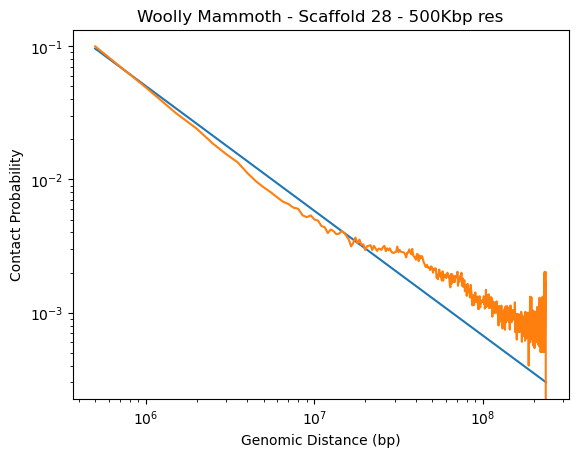

In [4]:
#Plot and fit Woolly Mammoth contact probability

xticks_woolly = np.linspace(1, dmax_woolly, dmax_woolly)
scale_factor_woolly = map_res
scaled_xticks_woolly = scale_factor_woolly*xticks_woolly

#Fit to Woolly-Mammoth contact probability

from scipy.optimize import curve_fit

def power_fit(x, a, alpha):
    return a*x**alpha

params_woolly,  covariance_woolly  = curve_fit(f = power_fit, xdata = scaled_xticks_woolly, ydata = normalize_woolly, maxfev=10000)

print(params_woolly[1])

x = scaled_xticks_woolly
plt.plot(x, power_fit(x, params_woolly[0], params_woolly[1]))

plt.plot(scaled_xticks_woolly, normalize_woolly)
plt.yscale("log")
plt.xscale("log")

plt.xlabel('Genomic Distance (bp)')
plt.ylabel('Contact Probability')

plt.title("Woolly Mammoth - Scaffold 28 - 500Kbp res")

plt.show()

In [5]:
output_dir_0_tau = '/scratch/b.zubillagaherrera/woolly_init_chop_2/degraded_distance_contact_map_02/'
g_5500_0_tau=np.load(output_dir_0_tau+'5500_degcuts/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_100000_ncycle_1_icycle_0_rc_1.5_diff.npz', allow_pickle=True)


output_dir_1_tau = '/scratch/b.zubillagaherrera/woolly_init_chop_2/degraded_distance_contact_map_03/'
g_5500_1_tau=np.load(output_dir_1_tau+'5500_degcuts/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_100000_ncycle_1_icycle_0_rc_1.5_diff.npz', allow_pickle=True)


In [6]:
output_dir_coarse_tau = '/scratch/b.zubillagaherrera/woolly_init_chop_2/degraded_distance_contact_map/'
g_5500_coarse_tau=np.load(output_dir_coarse_tau+'5500_degcuts/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_5000000_ncycle_1_icycle_0_rc_1.5_diff.npz', allow_pickle=True)

In [7]:
output_dir_RMSD50 = '/scratch/b.zubillagaherrera/woolly_init_chop_2/degraded_distance_contact_map/'
g_5500_RMSD50=np.load(output_dir_coarse_tau+'5500_degcuts_RMSD_50/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_5000000_ncycle_1_icycle_0_rc_1.5_diff.npz', allow_pickle=True)
output_dir_RMSD100 = '/scratch/b.zubillagaherrera/woolly_init_chop_2/degraded_distance_contact_map/'
g_5500_RMSD100=np.load(output_dir_coarse_tau+'5500_degcuts_RMSD_100/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_5000000_ncycle_1_icycle_0_rc_1.5_diff.npz', allow_pickle=True)
output_dir_RMSD150 = '/scratch/b.zubillagaherrera/woolly_init_chop_2/degraded_distance_contact_map/'
g_5500_RMSD150=np.load(output_dir_coarse_tau+'5500_degcuts_RMSD_150/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_5000000_ncycle_1_icycle_0_rc_1.5_diff.npz', allow_pickle=True)
output_dir_RMSD200 = '/scratch/b.zubillagaherrera/woolly_init_chop_2/degraded_distance_contact_map/'
g_5500_RMSD200=np.load(output_dir_coarse_tau+'5500_degcuts_RMSD_200/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_5000000_ncycle_1_icycle_0_rc_1.5_diff.npz', allow_pickle=True)

In [8]:
g_5500_RMSD150_v2=np.load(output_dir_coarse_tau+'5500_degcuts_RMSD_150_v2/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_5000000_ncycle_1_icycle_0_rc_1.5_diff.npz', allow_pickle=True)
output_dir_RMSD200 = '/scratch/b.zubillagaherrera/woolly_init_chop_2/degraded_distance_contact_map/'
g_5500_RMSD200_v2=np.load(output_dir_coarse_tau+'5500_degcuts_RMSD_200_v2/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_5000000_ncycle_1_icycle_0_rc_1.5_diff.npz', allow_pickle=True)

g_5500_RMSD10_finer=np.load(output_dir_coarse_tau+'5500_degcuts_RMSD_10_finer/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_100000_ncycle_1_icycle_0_rc_1.5_diff.npz', allow_pickle=True)

In [9]:
g_5500_RMSD25_finer = np.load(output_dir_coarse_tau+'5500_degcuts_RMSD_25_finer/degraded_distance_contact_map_C_7_region_95.4-96.5_ncut_5499_nsteps_100000_ncycle_1_icycle_0_rc_1.5_diff.npz')

In [10]:
print(g_5500_0_tau.files)
print(g_5500_1_tau.files)

['iframes', 'nsnapshots', 'distance_map_average', 'contact_map_average', 'contact_prob_average', 'nf', 'n_files', 'mean_square_disp']
['iframes', 'nsnapshots', 'distance_map_average', 'contact_map_average', 'contact_prob_average', 'nf', 'n_files', 'mean_square_disp']


In [11]:
print(g_5500_coarse_tau.files)

['iframes', 'nsnapshots', 'distance_map_average', 'contact_map_average', 'contact_prob_average', 'nf', 'n_files', 'mean_square_disp']


In [12]:
print(g_5500_RMSD200.files, g_5500_RMSD200_v2.files, g_5500_RMSD10_finer.files, g_5500_RMSD25_finer.files)

['iframes', 'nsnapshots', 'distance_map_average', 'contact_map_average', 'contact_prob_average', 'nf', 'n_files', 'mean_square_disp'] ['iframes', 'nsnapshots', 'distance_map_average', 'contact_map_average', 'contact_prob_average', 'nf', 'n_files', 'mean_square_disp'] ['iframes', 'nsnapshots', 'distance_map_average', 'contact_map_average', 'contact_prob_average', 'nf', 'n_files', 'mean_square_disp'] ['iframes', 'nsnapshots', 'distance_map_average', 'contact_map_average', 'contact_prob_average', 'nf', 'n_files', 'mean_square_disp']


In [13]:

nsnap_5500_1_tau = g_5500_1_tau['nsnapshots']
iframes_5500_1_tau = g_5500_1_tau['iframes']
dist_map_5500_1_tau = g_5500_1_tau['distance_map_average']
cont_map_5500_1_tau = g_5500_1_tau['contact_map_average']
cont_prob_5500_1_tau = g_5500_1_tau['contact_prob_average']
nf_5500_1_tau = g_5500_1_tau['nf']
n_files_5500_1_tau = g_5500_1_tau['n_files']
msd_5500_1_tau = g_5500_1_tau['mean_square_disp']

nsnap_5500_0_tau = g_5500_0_tau['nsnapshots']
iframes_5500_0_tau = g_5500_0_tau['iframes']
dist_map_5500_0_tau = g_5500_0_tau['distance_map_average']
cont_map_5500_0_tau = g_5500_0_tau['contact_map_average']
cont_prob_5500_0_tau = g_5500_0_tau['contact_prob_average']
nf_5500_0_tau = g_5500_0_tau['nf']
n_files_5500_0_tau = g_5500_0_tau['n_files']
msd_5500_0_tau = g_5500_0_tau['mean_square_disp']


In [14]:
nsnap_5500_coarse_tau = g_5500_coarse_tau['nsnapshots']
iframes_5500_coarse_tau = g_5500_coarse_tau['iframes']
dist_map_5500_coarse_tau = g_5500_coarse_tau['distance_map_average']
cont_map_5500_coarse_tau = g_5500_coarse_tau['contact_map_average']
cont_prob_5500_coarse_tau = g_5500_coarse_tau['contact_prob_average']
nf_5500_coarse_tau = g_5500_coarse_tau['nf']
n_files_5500_coarse_tau = g_5500_coarse_tau['n_files']
msd_5500_coarse_tau = g_5500_coarse_tau['mean_square_disp']

In [15]:
nsnap_5500_RMSD50 = g_5500_RMSD50['nsnapshots']
iframes_5500_RMSD50 = g_5500_RMSD50['iframes']
dist_map_5500_RMSD50 = g_5500_RMSD50['distance_map_average']
cont_map_5500_RMSD50 = g_5500_RMSD50['contact_map_average']
cont_prob_5500_RMSD50 = g_5500_RMSD50['contact_prob_average']
nf_5500_RMSD50 = g_5500_RMSD50['nf']
n_files_5500_RMSD50 = g_5500_RMSD50['n_files']
msd_5500_RMSD50 = g_5500_RMSD50['mean_square_disp']

nsnap_5500_RMSD100 = g_5500_RMSD100['nsnapshots']
iframes_5500_RMSD100 = g_5500_RMSD100['iframes']
dist_map_5500_RMSD100 = g_5500_RMSD100['distance_map_average']
cont_map_5500_RMSD100 = g_5500_RMSD100['contact_map_average']
cont_prob_5500_RMSD100 = g_5500_RMSD100['contact_prob_average']
nf_5500_RMSD100 = g_5500_RMSD100['nf']
n_files_5500_RMSD100 = g_5500_RMSD100['n_files']
msd_5500_RMSD100 = g_5500_RMSD100['mean_square_disp']

nsnap_5500_RMSD150 = g_5500_RMSD150['nsnapshots']
iframes_5500_RMSD150 = g_5500_RMSD150['iframes']
dist_map_5500_RMSD150 = g_5500_RMSD150['distance_map_average']
cont_map_5500_RMSD150 = g_5500_RMSD150['contact_map_average']
cont_prob_5500_RMSD150 = g_5500_RMSD150['contact_prob_average']
nf_5500_RMSD150 = g_5500_RMSD150['nf']
n_files_5500_RMSD150 = g_5500_RMSD150['n_files']
msd_5500_RMSD150 = g_5500_RMSD150['mean_square_disp']

nsnap_5500_RMSD200 = g_5500_RMSD200['nsnapshots']
iframes_5500_RMSD200 = g_5500_RMSD200['iframes']
dist_map_5500_RMSD200 = g_5500_RMSD200['distance_map_average']
cont_map_5500_RMSD200 = g_5500_RMSD200['contact_map_average']
cont_prob_5500_RMSD200 = g_5500_RMSD200['contact_prob_average']
nf_5500_RMSD200 = g_5500_RMSD200['nf']
n_files_5500_RMSD200 = g_5500_RMSD200['n_files']
msd_5500_RMSD200 = g_5500_RMSD200['mean_square_disp']

In [16]:
#ZERO IN ON 150 and 200 nm !!!

nsnap_5500_RMSD150 = g_5500_RMSD150_v2['nsnapshots']
iframes_5500_RMSD150 = g_5500_RMSD150_v2['iframes']
dist_map_5500_RMSD150 = g_5500_RMSD150_v2['distance_map_average']
cont_map_5500_RMSD150 = g_5500_RMSD150_v2['contact_map_average']
cont_prob_5500_RMSD150 = g_5500_RMSD150_v2['contact_prob_average']
nf_5500_RMSD150 = g_5500_RMSD150_v2['nf']
n_files_5500_RMSD150 = g_5500_RMSD150_v2['n_files']
msd_5500_RMSD150 = g_5500_RMSD150_v2['mean_square_disp']

nsnap_5500_RMSD200 = g_5500_RMSD200_v2['nsnapshots']
iframes_5500_RMSD200 = g_5500_RMSD200_v2['iframes']
dist_map_5500_RMSD200 = g_5500_RMSD200_v2['distance_map_average']
cont_map_5500_RMSD200 = g_5500_RMSD200_v2['contact_map_average']
cont_prob_5500_RMSD200 = g_5500_RMSD200_v2['contact_prob_average']
nf_5500_RMSD200 = g_5500_RMSD200_v2['nf']
n_files_5500_RMSD200 = g_5500_RMSD200_v2['n_files']
msd_5500_RMSD200 = g_5500_RMSD200_v2['mean_square_disp']

In [17]:
nsnap_5500_RMSD10 = g_5500_RMSD10_finer['nsnapshots']
iframes_5500_RMSD10 = g_5500_RMSD10_finer['iframes']
dist_map_5500_RMSD10 = g_5500_RMSD10_finer['distance_map_average']
cont_map_5500_RMSD10 = g_5500_RMSD10_finer['contact_map_average']
cont_prob_5500_RMSD10 = g_5500_RMSD10_finer['contact_prob_average']
nf_5500_RMSD10 = g_5500_RMSD10_finer['nf']
n_files_5500_RMSD10 = g_5500_RMSD10_finer['n_files']
msd_5500_RMSD10 = g_5500_RMSD10_finer['mean_square_disp']

In [18]:
nsnap_5500_RMSD25 = g_5500_RMSD25_finer['nsnapshots']
iframes_5500_RMSD25 = g_5500_RMSD25_finer['iframes']
dist_map_5500_RMSD25 = g_5500_RMSD25_finer['distance_map_average']
cont_map_5500_RMSD25 = g_5500_RMSD25_finer['contact_map_average']
cont_prob_5500_RMSD25 = g_5500_RMSD25_finer['contact_prob_average']
nf_5500_RMSD25 = g_5500_RMSD25_finer['nf']
n_files_5500_RMSD25 = g_5500_RMSD25_finer['n_files']
msd_5500_RMSD25 = g_5500_RMSD25_finer['mean_square_disp']

In [19]:
for i in range(len(msd_5500_coarse_tau)):
    print(iframes_5500_coarse_tau[i], msd_5500_coarse_tau[i])

0 0.0
199 381.0267772338867
399 782.4698038574219
599 1183.7529149902343
799 1582.9381109375
999 1976.838588647461
1999 3729.958712988281
3999 5843.8419125
4999 6402.925076660156


In [20]:
print(nf_5500_0_tau, nf_5500_1_tau)
print(n_files_5500_0_tau, nf_5500_1_tau)

5000 5000
[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.] 5000


In [21]:
print(nf_5500_RMSD50, nf_5500_RMSD50)
print(n_files_5500_RMSD50, nf_5500_RMSD50)

5000 5000
[5000. 5000. 5000. 5000. 5000. 5000. 5000.] 5000


In [22]:
print(dist_map_5500_0_tau.shape,cont_map_5500_0_tau.shape,cont_prob_5500_0_tau.shape,nf_5500_0_tau.shape)
#print(dist_map_1000.shape,cont_map_1000.shape,cont_prob_1000.shape,nf_1000.shape)

(11, 5500, 5500) (11, 5500, 5500) (11, 5499) ()


In [23]:
degrade_legend = ['No. deg. cuts = '+str(0),'No. deg. cuts = '+str(200), 'No. deg. cuts = '+str(500),'No. deg. cuts = '+str(1000),'No. deg. cuts = '+str(1500),'No. deg. cuts = '+str(3000),'No. deg. cuts = '+str(5000),'No. deg. cuts = '+str(5500)]

In [24]:
print(iframes_5500_0_tau)
print(iframes_5500_1_tau)
print(iframes_5500_coarse_tau)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0 10 20 30 40 50 60 70 80 90 99]
[   0  199  399  599  799  999 1999 3999 4999]


In [25]:
print(iframes_5500_RMSD10)
print(iframes_5500_RMSD25)
print(iframes_5500_RMSD50)
print(iframes_5500_RMSD100)
print(iframes_5500_RMSD150)
print(iframes_5500_RMSD200)

for i in range(len(msd_5500_RMSD10)):
    print(i, iframes_5500_RMSD10[i], 10*np.sqrt(msd_5500_RMSD10[i]))
    
for i in range(len(msd_5500_RMSD25)):
    print(i, iframes_5500_RMSD25[i], 10*np.sqrt(msd_5500_RMSD25[i]))

for i in range(len(msd_5500_RMSD50)):
    print(i, iframes_5500_RMSD50[i], 10*np.sqrt(msd_5500_RMSD50[i]))
    
for i in range(len(msd_5500_RMSD100)):
    print(i, iframes_5500_RMSD100[i], 10*np.sqrt(msd_5500_RMSD100[i]))
    
for i in range(len(msd_5500_RMSD150)):
    print(i, iframes_5500_RMSD150[i], 10*np.sqrt(msd_5500_RMSD150[i]))
    
for i in range(len(msd_5500_RMSD200)):
    print(i, iframes_5500_RMSD200[i], 10*np.sqrt(msd_5500_RMSD200[i]))

[   0   33   34   35   36   37   38   39   40   41   42   43  320  322
  324  326  328  330  332  334  336  338  340  342 1120 1130 1140 1150
 1160 1170]
[  0 100 102 104 105 106 107 108 109 110 111 112 113 114 115 116 118 120]
[ 0 16 17 18 19 20 21]
[ 0 56 57 58 59 60 61]
[  0 120 121 122 123 124 125 126 127 128 129]
[  0 204 205 206 207 208 209 210 211 212 213]
0 0 0.0
1 33 9.699769400591252
2 34 9.977198450883796
3 35 10.25168365897638
4 36 10.52323306739664
5 37 10.791931062365956
6 38 11.057810487163513
7 39 11.320909072815436
8 40 11.581257723884457
9 41 11.838878610126057
10 42 12.093825208247733
11 43 12.346156561728595
12 320 48.57745496482267
13 322 48.75439123007371
14 324 48.930768012453825
15 326 49.106560721718566
16 328 49.28188080146282
17 330 49.45673130533478
18 332 49.63104622201815
19 334 49.80473600602724
20 336 49.97788333561286
21 338 50.150589777253956
22 340 50.32285666489884
23 342 50.49467523923859
24 1120 98.73207982504152
25 1130 99.21703539057361
26 1140 9

In [31]:
msd_5500_coarse_tau

array([   0.        ,  381.02677723,  782.46980386, 1183.75291499,
       1582.93811094, 1976.83858865, 3729.95871299, 5843.8419125 ,
       6402.92507666])

In [32]:
#Import experimental data from npz file at a resultion of 1KB
g_exp=np.load('/scratch/b.zubillagaherrera/woolly_init_chop_2/degraded_distance_contact_map/experimental-hic.npz', allow_pickle=True)
exp_ligprob = g_exp['exp_ligprob']
exp_map     = g_exp['ex_map']

In [33]:
#Calculation ligation probability vs genomic distance for experimental data
dmax = exp_map.shape[0] - 1
init = 1
contact_map_average = exp_map
contact_prob_average = np.zeros(dmax)
for i in range(dmax):
    contact_prob_average[i] =  np.mean(np.diagonal(contact_map_average, offset=(i+init)))    
normalize = contact_prob_average/np.sum(contact_prob_average)

In [34]:
degrade_legend = ['Woolly Mammoth - Scaff 28 - 500Kb','Experimental - 1Kb (Nat. Comm 14, 3303 (2023))', 't = '+str(0)+r'$\tau$','t = '+str(1)+r'$\tau$','t = '+str(2)+r'$\tau$','t = '+str(3)+r'$\tau$','t = '+str(4)+r'$\tau$','t = '+str(5)+r'$\tau$','t = '+str(6)+r'$\tau$','t = '+str(7)+r'$\tau$','t = '+str(8)+r'$\tau$','t = '+str(9)+r'$\tau$','t = '+str(10)+r'$\tau$']
degrade_legend.extend(['t = '+str(20)+r'$\tau$','t = '+str(30)+r'$\tau$','t = '+str(40)+r'$\tau$','t = '+str(50)+r'$\tau$','t = '+str(60)+r'$\tau$','t = '+str(70)+r'$\tau$','t = '+str(80)+r'$\tau$','t = '+str(90)+r'$\tau$','t = '+str(100)+r'$\tau$'])
degrade_legend.extend(['t = '+str(200)+r'$\tau$','t = '+str(400)+r'$\tau$','t = '+str(600)+r'$\tau$','t = '+str(800)+r'$\tau$','t = '+str(1000)+r'$\tau$'])
degrade_legend.extend(['t = '+str(2000)+r'$\tau$','t = '+str(4000)+r'$\tau$','t = '+str(5000)+r'$\tau$'])

In [35]:
#degrade_legend

In [36]:
degrade_legend_0_tau = ['Experimental - 1Kb', 't = '+str(0)+r'$\tau$','t = '+str(1)+r'$\tau$','t = '+str(2)+r'$\tau$','t = '+str(3)+r'$\tau$','t = '+str(4)+r'$\tau$','t = '+str(5)+r'$\tau$','t = '+str(6)+r'$\tau$','t = '+str(7)+r'$\tau$','t = '+str(8)+r'$\tau$','t = '+str(9)+r'$\tau$','t = '+str(10)+r'$\tau$']

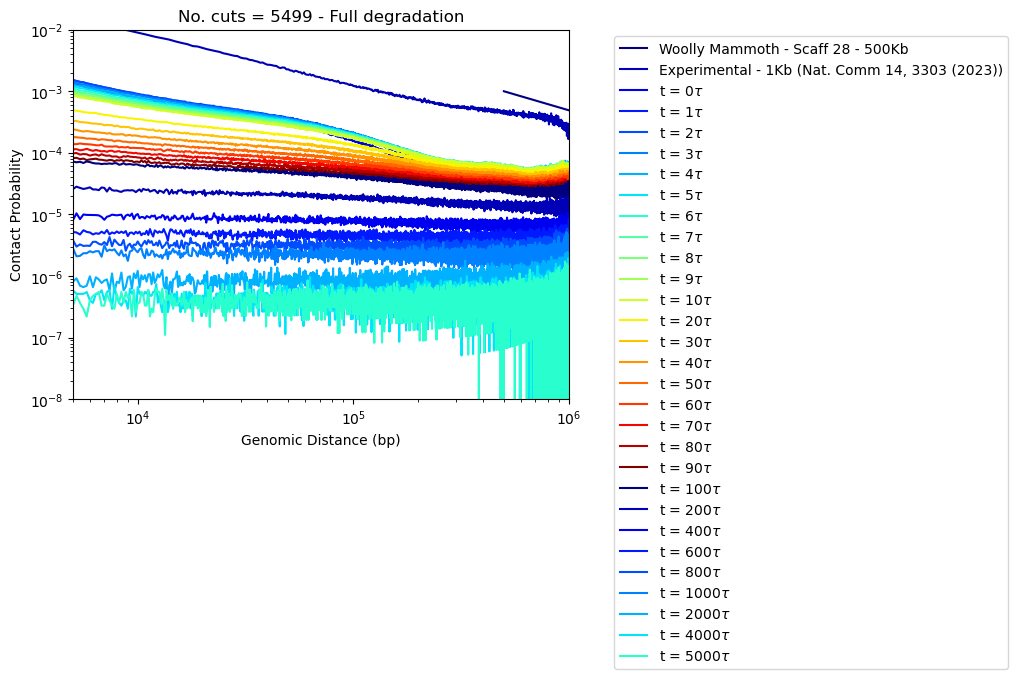

In [37]:
num_plots = 21

lower_bound = 1

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

#Woolly Mammoth data
xticks_woolly = np.linspace(1, dmax_woolly, dmax_woolly)
scale_factor_woolly = map_res
scaled_xticks_woolly = scale_factor_woolly*xticks_woolly
plt.plot(scaled_xticks_woolly, normalize_woolly/100)

#Experimental Nat. Comm. 2023 data
xticks_exp = np.linspace(1, dmax, dmax)
scale_factor_exp = 1000
scaled_xticks_exp = scale_factor_exp*xticks_exp
plt.plot(scaled_xticks_exp, normalize)

xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

xticks = np.linspace(1, 5500, 5499) 

scale_factor = 200
scaled_xticks = scale_factor*xticks


#plt.plot(scaled_xticks, cont_prob_5000_0_tau[0])

for i in range(nsnap_5500_0_tau):
    plt.plot(scaled_xticks, cont_prob_5500_0_tau[i])
    
for i in range(2,nsnap_5500_1_tau):
    plt.plot(scaled_xticks, cont_prob_5500_1_tau[i])
    
for i in range(1,nsnap_5500_coarse_tau):
    plt.plot(scaled_xticks,cont_prob_5500_coarse_tau[i])



plt.legend(degrade_legend, loc='upper right')
plt.xlim([0,5500])
plt.ylabel('Contact Probability')
plt.yscale("log")
plt.xscale("log")
plt.title("No. cuts = 5499 - Full degradation")
plt.xlim([1,5500])
plt.ylim([1e-8,1e1])


plt.xlim([scale_factor*1,scale_factor*5500])

plt.ylim([1e-8,1e-2])
plt.xlim(5000, 1000000)
plt.xlabel('Genomic Distance (bp)')

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.9, 1.0))

plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [38]:
degrade_legend = ['Experimental - 1Kb', 'No. deg. cuts = '+str(100), 'No. deg. cuts = '+str(500),'No. deg. cuts = '+str(1000),'No. deg. cuts = '+str(1500),'No. deg. cuts = '+str(3000),'No. deg. cuts = '+str(5000)]


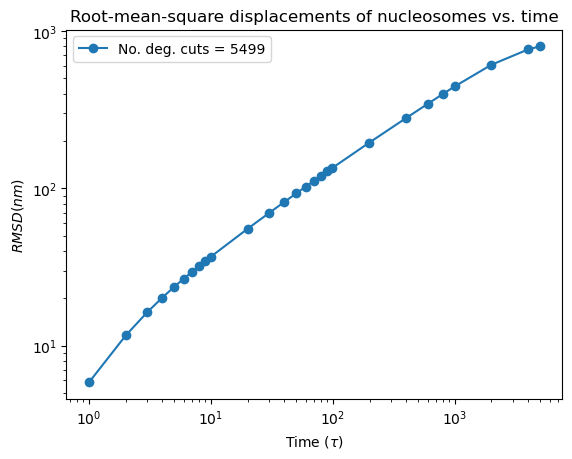

In [39]:
degrade_legend = ['No. deg. cuts = '+str(5499)]

iframes_5500 = []
iframes_5500.extend(iframes_5500_0_tau[0:-1])
iframes_5500.extend(iframes_5500_1_tau[1:])
iframes_5500.extend(iframes_5500_coarse_tau[1:])

msd_5500 = []
msd_5500.extend(msd_5500_0_tau[0:-1])
msd_5500.extend(msd_5500_1_tau[1:])
msd_5500.extend(msd_5500_coarse_tau[1:])

msd_5500_all = copy.deepcopy(msd_5500)

#msd_5500_all.extend(msd_5000_coarse_tau[2:])

#plt.plot(iframes_5000_0_tau[1:-1], msd_5000_0_tau[1:-1], marker = 'o')
#plt.plot(iframes_5000_1_tau[1:-1], msd_5000_1_tau[1:-1], marker = 'o')
#plt.plot(iframes_5000[1:-1], )

plt.plot(iframes_5500[1:], 10*np.sqrt(msd_5500[1:]), marker = 'o')

plt.legend(degrade_legend, loc='upper left')
#plt.xlim([0,5500])
plt.ylabel(r'$RMSD (nm)$')
plt.yscale("log")
plt.xscale("log")
plt.title("Root-mean-square displacements of nucleosomes vs. time")
#plt.xlim([1,5500])
#plt.ylim([1e1,1e1])


#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel('Time ('+r'$\tau$)')

plt.show()



In [40]:
for i in range(len(msd_5500_all)):
    print(i, iframes_5500[i], 10*np.sqrt(msd_5500_all)[i])

0 0 0.0
1 1 5.83293009684669
2 2 11.581197621185384
3 3 16.272293875035352
4 4 20.202762767969688
5 5 23.616483317434973
6 6 26.669166438854436
7 7 29.456834315334845
8 8 32.03923579889332
9 9 34.46097361353243
10 10 36.74959768347551
11 20 55.28324362343398
12 30 69.66218975113732
13 40 81.89366051448395
14 50 92.72538546525527
15 60 102.55242312510498
16 70 111.59750491740523
17 80 120.0287578278159
18 90 127.95847332510229
19 99 134.7211310188768
20 199 195.1990720351628
21 399 279.72661722786086
22 599 344.0571049971551
23 799 397.86154764408934
24 999 444.616530129893
25 1999 610.7338792787151
26 3999 764.450254267732
27 4999 800.1827964071808


In [129]:
#print(scaled_xticks[49],scaled_xticks[lower_bound], scaled_xticks[upper_bound])

In [130]:
#msd_5000_all

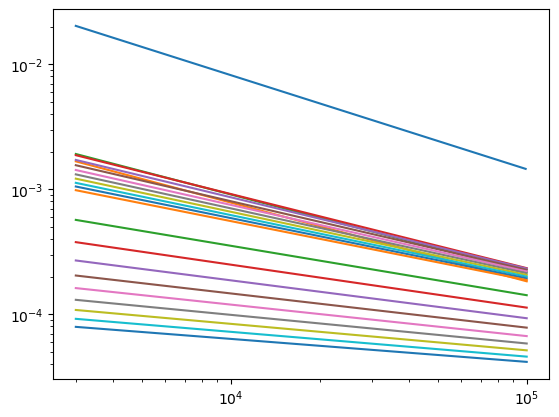

In [41]:
#FITS TO THE LEFT OF THE ELBOW

from scipy.optimize import curve_fit

def power_fit(x, a, alpha):
    return a*x**alpha

#print(len(scaled_xticks), len(cont_prob_5500))

lower_bound = 499

params_exp,  covariance_exp  = curve_fit(f = power_fit, xdata = scaled_xticks_exp[2:99], ydata = normalize[2:99], maxfev=10000)

params_00, covariance_00 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[0][49:lower_bound], maxfev=10000)
params_01, covariance_01 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[1][49:lower_bound], maxfev=10000)
params_02, covariance_02 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[2][49:lower_bound], maxfev=10000)
params_03, covariance_03 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[3][49:lower_bound], maxfev=10000)
params_04, covariance_04 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[4][49:lower_bound], maxfev=10000)
params_05, covariance_05 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[5][49:lower_bound], maxfev=10000)
params_06, covariance_06 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[6][49:lower_bound], maxfev=10000)
params_07, covariance_07 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[7][49:lower_bound], maxfev=10000)
params_08, covariance_08 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[8][49:lower_bound], maxfev=10000)
params_09, covariance_09 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[9][49:lower_bound], maxfev=10000)
params_10, covariance_10 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[10][49:lower_bound], maxfev=10000)

params_20, covariance_20 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[2][49:lower_bound], maxfev=10000)
params_30, covariance_30 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[3][49:lower_bound], maxfev=10000)
params_40, covariance_40 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[4][49:lower_bound], maxfev=10000)
params_50, covariance_50 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[5][49:lower_bound], maxfev=10000)
params_60, covariance_60 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[6][49:lower_bound], maxfev=10000)
params_70, covariance_70 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[7][49:lower_bound], maxfev=10000)
params_80, covariance_80 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[8][49:lower_bound], maxfev=10000)
params_90, covariance_90 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[9][49:lower_bound], maxfev=10000)
params_100, covariance_100 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[10][49:lower_bound], maxfev=10000)

x= scaled_xticks_exp[2:99]
plt.plot(x, power_fit(x, params_exp[0], params_exp[1]))

x= scaled_xticks[14:lower_bound]
plt.plot(x, power_fit(x, params_00[0], params_00[1]))
plt.plot(x, power_fit(x, params_01[0], params_01[1]))
plt.plot(x, power_fit(x, params_02[0], params_02[1]))
plt.plot(x, power_fit(x, params_03[0], params_03[1]))
plt.plot(x, power_fit(x, params_04[0], params_04[1]))
plt.plot(x, power_fit(x, params_05[0], params_05[1]))
plt.plot(x, power_fit(x, params_06[0], params_06[1]))
plt.plot(x, power_fit(x, params_07[0], params_07[1]))
plt.plot(x, power_fit(x, params_08[0], params_08[1]))
plt.plot(x, power_fit(x, params_09[0], params_09[1]))
plt.plot(x, power_fit(x, params_10[0], params_10[1]))
plt.plot(x, power_fit(x, params_20[0], params_20[1]))
plt.plot(x, power_fit(x, params_30[0], params_30[1]))
plt.plot(x, power_fit(x, params_40[0], params_40[1]))
plt.plot(x, power_fit(x, params_50[0], params_50[1]))
plt.plot(x, power_fit(x, params_60[0], params_60[1]))
plt.plot(x, power_fit(x, params_70[0], params_70[1]))
plt.plot(x, power_fit(x, params_80[0], params_80[1]))
plt.plot(x, power_fit(x, params_90[0], params_90[1]))
plt.plot(x, power_fit(x, params_100[0], params_100[1]))

plt.yscale("log")
plt.xscale("log")

slope_5500_l = np.abs(np.array([params_00[1],params_01[1],params_02[1],params_03[1],params_04[1],params_05[1],params_06[1],params_07[1],params_08[1],params_09[1],params_10[1],params_20[1],params_30[1],params_40[1],params_50[1],params_60[1],params_70[1],params_80[1],params_90[1],params_100[1]]))

0 0 0.0
1 33 9.699769400591252
2 34 9.977198450883796
3 35 10.25168365897638
4 36 10.52323306739664
5 37 10.791931062365956
6 38 11.057810487163513
7 39 11.320909072815436
8 40 11.581257723884457
9 41 11.838878610126057
10 42 12.093825208247733
11 43 12.346156561728595
12 320 48.57745496482267
13 322 48.75439123007371
14 324 48.930768012453825
15 326 49.106560721718566
16 328 49.28188080146282
17 330 49.45673130533478
18 332 49.63104622201815
19 334 49.80473600602724
20 336 49.97788333561286
21 338 50.150589777253956
22 340 50.32285666489884
23 342 50.49467523923859
24 1120 98.73207982504152
25 1130 99.21703539057361
26 1140 99.69971901214093
27 1150 100.18091098148062
28 1160 100.6604444183295
29 1170 101.1378502352785
0 0 0.0
1 100 23.616896302361518
2 102 23.936548458340123
3 104 24.252698716294354
4 105 24.409542373749535
5 106 24.56559333988484
6 107 24.720837118625486
7 108 24.87527312699089
8 109 25.028912624807575
9 110 25.181770016547794
10 111 25.333847540501388
11 112 25.485

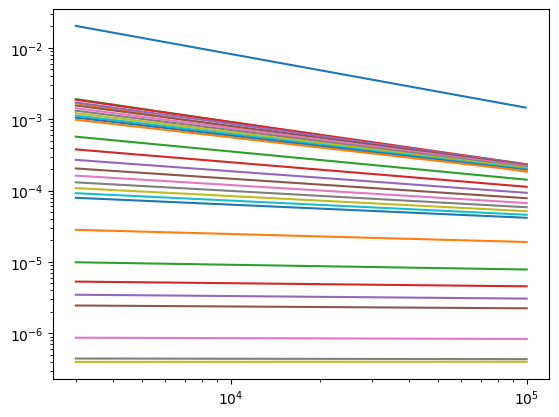

In [42]:
#FITS TO THE LEFT OF THE ELBOW INCLUDING ALL TIMES (EVEN THE COARSE)

from scipy.optimize import curve_fit

def power_fit(x, a, alpha):
    return a*x**alpha

#print(len(scaled_xticks), len(cont_prob_5500))

lower_bound = 499

params_exp,  covariance_exp  = curve_fit(f = power_fit, xdata = scaled_xticks_exp[2:99], ydata = normalize[2:99], maxfev=10000)

params_00, covariance_00 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[0][49:lower_bound], maxfev=10000)
params_01, covariance_01 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[1][49:lower_bound], maxfev=10000)
params_02, covariance_02 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[2][49:lower_bound], maxfev=10000)
params_03, covariance_03 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[3][49:lower_bound], maxfev=10000)
params_04, covariance_04 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[4][49:lower_bound], maxfev=10000)
params_05, covariance_05 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[5][49:lower_bound], maxfev=10000)
params_06, covariance_06 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[6][49:lower_bound], maxfev=10000)
params_07, covariance_07 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[7][49:lower_bound], maxfev=10000)
params_08, covariance_08 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[8][49:lower_bound], maxfev=10000)
params_09, covariance_09 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[9][49:lower_bound], maxfev=10000)
params_10, covariance_10 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_0_tau[10][49:lower_bound], maxfev=10000)

params_20, covariance_20 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[2][49:lower_bound], maxfev=10000)
params_30, covariance_30 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[3][49:lower_bound], maxfev=10000)
params_40, covariance_40 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[4][49:lower_bound], maxfev=10000)
params_50, covariance_50 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[5][49:lower_bound], maxfev=10000)
params_60, covariance_60 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[6][49:lower_bound], maxfev=10000)
params_70, covariance_70 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[7][49:lower_bound], maxfev=10000)
params_80, covariance_80 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[8][49:lower_bound], maxfev=10000)
params_90, covariance_90 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[9][49:lower_bound], maxfev=10000)
params_100, covariance_100 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_1_tau[10][49:lower_bound], maxfev=10000)

params_200, covariance_200 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_coarse_tau[1][49:lower_bound], maxfev=10000)
params_400, covariance_400 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_coarse_tau[2][49:lower_bound], maxfev=10000)
params_600, covariance_600 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_coarse_tau[3][49:lower_bound], maxfev=10000)
params_800, covariance_800 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_coarse_tau[4][49:lower_bound], maxfev=10000)
params_1000, covariance_1000 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_coarse_tau[5][49:lower_bound], maxfev=10000)
params_2000, covariance_2000 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_coarse_tau[6][49:lower_bound], maxfev=10000)
params_4000, covariance_4000 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_coarse_tau[7][49:lower_bound], maxfev=10000)
params_5000, covariance_5000 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_coarse_tau[8][49:lower_bound], maxfev=10000)


#ADDITIONAL POINTS TO GET CLOSER TO DESIRED RMSD VALUES
params_RMSD10, covariance_RMSD10 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_RMSD10[3][49:lower_bound], maxfev=10000)
params_RMSD25, covariance_RMSD25 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_RMSD25[8][49:lower_bound], maxfev=10000)
params_RMSD50, covariance_RMSD50 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_RMSD10[21][49:lower_bound], maxfev=10000)
params_RMSD100, covariance_RMSD100 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_RMSD10[27][49:lower_bound], maxfev=10000)
params_RMSD150, covariance_RMSD150 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_RMSD150[2][49:lower_bound], maxfev=10000)
params_RMSD200, covariance_RMSD200 = curve_fit(f = power_fit, xdata = scaled_xticks[49:lower_bound], ydata = cont_prob_5500_RMSD200[6][49:lower_bound], maxfev=10000)

x= scaled_xticks_exp[2:99]
plt.plot(x, power_fit(x, params_exp[0], params_exp[1]))

x= scaled_xticks[14:lower_bound]
plt.plot(x, power_fit(x, params_00[0], params_00[1]))
plt.plot(x, power_fit(x, params_01[0], params_01[1]))
plt.plot(x, power_fit(x, params_02[0], params_02[1]))
plt.plot(x, power_fit(x, params_03[0], params_03[1]))
plt.plot(x, power_fit(x, params_04[0], params_04[1]))
plt.plot(x, power_fit(x, params_05[0], params_05[1]))
plt.plot(x, power_fit(x, params_06[0], params_06[1]))
plt.plot(x, power_fit(x, params_07[0], params_07[1]))
plt.plot(x, power_fit(x, params_08[0], params_08[1]))
plt.plot(x, power_fit(x, params_09[0], params_09[1]))
plt.plot(x, power_fit(x, params_10[0], params_10[1]))
plt.plot(x, power_fit(x, params_20[0], params_20[1]))
plt.plot(x, power_fit(x, params_30[0], params_30[1]))
plt.plot(x, power_fit(x, params_40[0], params_40[1]))
plt.plot(x, power_fit(x, params_50[0], params_50[1]))
plt.plot(x, power_fit(x, params_60[0], params_60[1]))
plt.plot(x, power_fit(x, params_70[0], params_70[1]))
plt.plot(x, power_fit(x, params_80[0], params_80[1]))
plt.plot(x, power_fit(x, params_90[0], params_90[1]))
plt.plot(x, power_fit(x, params_100[0], params_100[1]))
plt.plot(x, power_fit(x, params_200[0], params_200[1]))
plt.plot(x, power_fit(x, params_400[0], params_400[1]))
plt.plot(x, power_fit(x, params_600[0], params_600[1]))
plt.plot(x, power_fit(x, params_800[0], params_800[1]))
plt.plot(x, power_fit(x, params_1000[0], params_1000[1]))
plt.plot(x, power_fit(x, params_2000[0], params_2000[1]))
plt.plot(x, power_fit(x, params_4000[0], params_4000[1]))
plt.plot(x, power_fit(x, params_5000[0], params_5000[1]))

plt.yscale("log")
plt.xscale("log")

slope_5500_l = np.abs(np.array([params_00[1],params_01[1],params_02[1],params_03[1],params_04[1],params_05[1],params_06[1],params_07[1],params_08[1],params_09[1],params_10[1],params_20[1],params_30[1],params_40[1],params_50[1],params_60[1],params_70[1],params_80[1],params_90[1],params_100[1]]))
slope_5500_l_all = np.abs(np.array([params_00[1],params_01[1],params_02[1],params_03[1],params_04[1],params_05[1],params_06[1],params_07[1],params_08[1],params_09[1],params_10[1],params_20[1],params_30[1],params_40[1],params_50[1],params_60[1],params_70[1],params_80[1],params_90[1],params_100[1]])) 
slope_5500_l_all = np.append(slope_5500_l_all,np.abs([params_200[1],params_400[1],params_600[1],params_800[1],params_1000[1],params_2000[1],params_4000[1],params_5000[1]]))
#print(slope_5500_l_all)

for i in range(len(msd_5500_RMSD10)):
    print(i, iframes_5500_RMSD10[i], 10*np.sqrt(msd_5500_RMSD10[i]))
    
for i in range(len(msd_5500_RMSD25)):
    print(i, iframes_5500_RMSD25[i], 10*np.sqrt(msd_5500_RMSD25[i]))

for i in range(len(msd_5500_RMSD50)):
    print(i, iframes_5500_RMSD50[i], 10*np.sqrt(msd_5500_RMSD50[i]))
    
for i in range(len(msd_5500_RMSD100)):
    print(i, iframes_5500_RMSD100[i], 10*np.sqrt(msd_5500_RMSD100[i]))
    
for i in range(len(msd_5500_RMSD150)):
    print(i, iframes_5500_RMSD150[i], 10*np.sqrt(msd_5500_RMSD150[i]))
    
for i in range(len(msd_5500_RMSD200)):
    print(i, iframes_5500_RMSD200[i], 10*np.sqrt(msd_5500_RMSD200[i]))

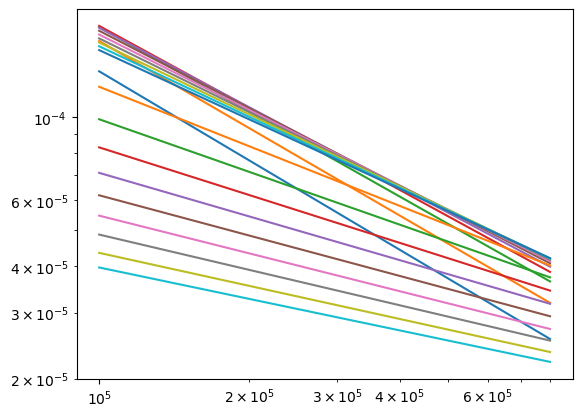

In [43]:
#FITS TO THE RIGHT OF THE ELBOW (100Kbp to 800Kbp)

from scipy.optimize import curve_fit

def power_fit(x, a, alpha):
    return a*x**alpha

#print(len(scaled_xticks), len(cont_prob_5500)


params_exp,  covariance_exp  = curve_fit(f = power_fit, xdata = scaled_xticks_exp[2:99], ydata = normalize[2:99], maxfev=10000)

lower_bound = 499
upper_bound = 3999 #999

params_00, covariance_00 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[0][lower_bound:upper_bound], maxfev=10000)
params_01, covariance_01 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[1][lower_bound:upper_bound], maxfev=10000)
params_02, covariance_02 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[2][lower_bound:upper_bound], maxfev=10000)
params_03, covariance_03 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[3][lower_bound:upper_bound], maxfev=10000)
params_04, covariance_04 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[4][lower_bound:upper_bound], maxfev=10000)
params_05, covariance_05 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[5][lower_bound:upper_bound], maxfev=10000)
params_06, covariance_06 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[6][lower_bound:upper_bound], maxfev=10000)
params_07, covariance_07 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[7][lower_bound:upper_bound], maxfev=10000)
params_08, covariance_08 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[8][lower_bound:upper_bound], maxfev=10000)
params_09, covariance_09 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[9][lower_bound:upper_bound], maxfev=10000)
params_10, covariance_10 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[10][lower_bound:upper_bound], maxfev=10000)

params_20, covariance_20 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[2][lower_bound:upper_bound], maxfev=10000)
params_30, covariance_30 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[3][lower_bound:upper_bound], maxfev=10000)
params_40, covariance_40 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[4][lower_bound:upper_bound], maxfev=10000)
params_50, covariance_50 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[5][lower_bound:upper_bound], maxfev=10000)
params_60, covariance_60 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[6][lower_bound:upper_bound], maxfev=10000)
params_70, covariance_70 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[7][lower_bound:upper_bound], maxfev=10000)
params_80, covariance_80 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[8][lower_bound:upper_bound], maxfev=10000)
params_90, covariance_90 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[9][lower_bound:upper_bound], maxfev=10000)
params_100, covariance_100 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[10][lower_bound:upper_bound], maxfev=10000)

#x= scaled_xticks_exp[2:99]
#plt.plot(x, power_fit(x, params_exp[0], params_exp[1]))

x= scaled_xticks[lower_bound:upper_bound]
plt.plot(x, power_fit(x, params_00[0], params_00[1]))
plt.plot(x, power_fit(x, params_01[0], params_01[1]))
plt.plot(x, power_fit(x, params_02[0], params_02[1]))
plt.plot(x, power_fit(x, params_03[0], params_03[1]))
plt.plot(x, power_fit(x, params_04[0], params_04[1]))
plt.plot(x, power_fit(x, params_05[0], params_05[1]))
plt.plot(x, power_fit(x, params_06[0], params_06[1]))
plt.plot(x, power_fit(x, params_07[0], params_07[1]))
plt.plot(x, power_fit(x, params_08[0], params_08[1]))
plt.plot(x, power_fit(x, params_09[0], params_09[1]))
plt.plot(x, power_fit(x, params_10[0], params_10[1]))
plt.plot(x, power_fit(x, params_20[0], params_20[1]))
plt.plot(x, power_fit(x, params_30[0], params_30[1]))
plt.plot(x, power_fit(x, params_40[0], params_40[1]))
plt.plot(x, power_fit(x, params_50[0], params_50[1]))
plt.plot(x, power_fit(x, params_60[0], params_60[1]))
plt.plot(x, power_fit(x, params_70[0], params_70[1]))
plt.plot(x, power_fit(x, params_80[0], params_80[1]))
plt.plot(x, power_fit(x, params_90[0], params_90[1]))
plt.plot(x, power_fit(x, params_100[0], params_100[1]))

plt.yscale("log")
plt.xscale("log")

slope_5500_r = np.abs(np.array([params_00[1],params_01[1],params_02[1],params_03[1],params_04[1],params_05[1],params_06[1],params_07[1],params_08[1],params_09[1],params_10[1],params_20[1],params_30[1],params_40[1],params_50[1],params_60[1],params_70[1],params_80[1],params_90[1],params_100[1]]))

In [134]:
scaled_xticks[49]

10001.7824663514

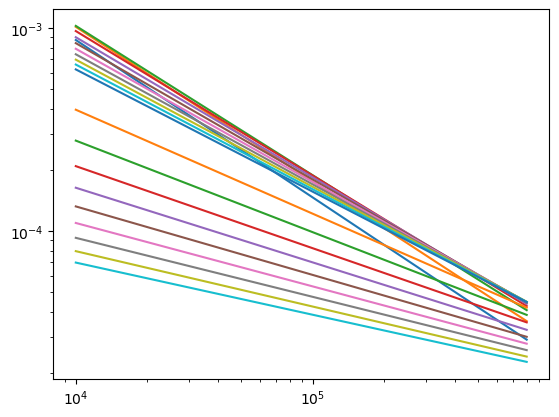

In [44]:
#FITS TO THE WHOLE INTERVAL: RIGHT + LEFT OF THE ELBOW

from scipy.optimize import curve_fit

def power_fit(x, a, alpha):
    return a*x**alpha

#print(len(scaled_xticks), len(cont_prob_5500)


params_exp,  covariance_exp  = curve_fit(f = power_fit, xdata = scaled_xticks_exp[2:99], ydata = normalize[2:99], maxfev=10000)

lower_bound = 49
upper_bound = 3999 #999

params_00, covariance_00 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[0][lower_bound:upper_bound], maxfev=10000)
params_01, covariance_01 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[1][lower_bound:upper_bound], maxfev=10000)
params_02, covariance_02 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[2][lower_bound:upper_bound], maxfev=10000)
params_03, covariance_03 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[3][lower_bound:upper_bound], maxfev=10000)
params_04, covariance_04 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[4][lower_bound:upper_bound], maxfev=10000)
params_05, covariance_05 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[5][lower_bound:upper_bound], maxfev=10000)
params_06, covariance_06 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[6][lower_bound:upper_bound], maxfev=10000)
params_07, covariance_07 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[7][lower_bound:upper_bound], maxfev=10000)
params_08, covariance_08 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[8][lower_bound:upper_bound], maxfev=10000)
params_09, covariance_09 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[9][lower_bound:upper_bound], maxfev=10000)
params_10, covariance_10 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_0_tau[10][lower_bound:upper_bound], maxfev=10000)

params_20, covariance_20 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[2][lower_bound:upper_bound], maxfev=10000)
params_30, covariance_30 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[3][lower_bound:upper_bound], maxfev=10000)
params_40, covariance_40 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[4][lower_bound:upper_bound], maxfev=10000)
params_50, covariance_50 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[5][lower_bound:upper_bound], maxfev=10000)
params_60, covariance_60 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[6][lower_bound:upper_bound], maxfev=10000)
params_70, covariance_70 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[7][lower_bound:upper_bound], maxfev=10000)
params_80, covariance_80 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[8][lower_bound:upper_bound], maxfev=10000)
params_90, covariance_90 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[9][lower_bound:upper_bound], maxfev=10000)
params_100, covariance_100 = curve_fit(f = power_fit, xdata = scaled_xticks[lower_bound:upper_bound], ydata = cont_prob_5500_1_tau[10][lower_bound:upper_bound], maxfev=10000)

#x= scaled_xticks_exp[2:99]
#plt.plot(x, power_fit(x, params_exp[0], params_exp[1]))

x= scaled_xticks[lower_bound:upper_bound]
plt.plot(x, power_fit(x, params_00[0], params_00[1]))
plt.plot(x, power_fit(x, params_01[0], params_01[1]))
plt.plot(x, power_fit(x, params_02[0], params_02[1]))
plt.plot(x, power_fit(x, params_03[0], params_03[1]))
plt.plot(x, power_fit(x, params_04[0], params_04[1]))
plt.plot(x, power_fit(x, params_05[0], params_05[1]))
plt.plot(x, power_fit(x, params_06[0], params_06[1]))
plt.plot(x, power_fit(x, params_07[0], params_07[1]))
plt.plot(x, power_fit(x, params_08[0], params_08[1]))
plt.plot(x, power_fit(x, params_09[0], params_09[1]))
plt.plot(x, power_fit(x, params_10[0], params_10[1]))
plt.plot(x, power_fit(x, params_20[0], params_20[1]))
plt.plot(x, power_fit(x, params_30[0], params_30[1]))
plt.plot(x, power_fit(x, params_40[0], params_40[1]))
plt.plot(x, power_fit(x, params_50[0], params_50[1]))
plt.plot(x, power_fit(x, params_60[0], params_60[1]))
plt.plot(x, power_fit(x, params_70[0], params_70[1]))
plt.plot(x, power_fit(x, params_80[0], params_80[1]))
plt.plot(x, power_fit(x, params_90[0], params_90[1]))
plt.plot(x, power_fit(x, params_100[0], params_100[1]))

plt.yscale("log")
plt.xscale("log")

slope_5500_all = np.abs(np.array([params_00[1],params_01[1],params_02[1],params_03[1],params_04[1],params_05[1],params_06[1],params_07[1],params_08[1],params_09[1],params_10[1],params_20[1],params_30[1],params_40[1],params_50[1],params_60[1],params_70[1],params_80[1],params_90[1],params_100[1]]))

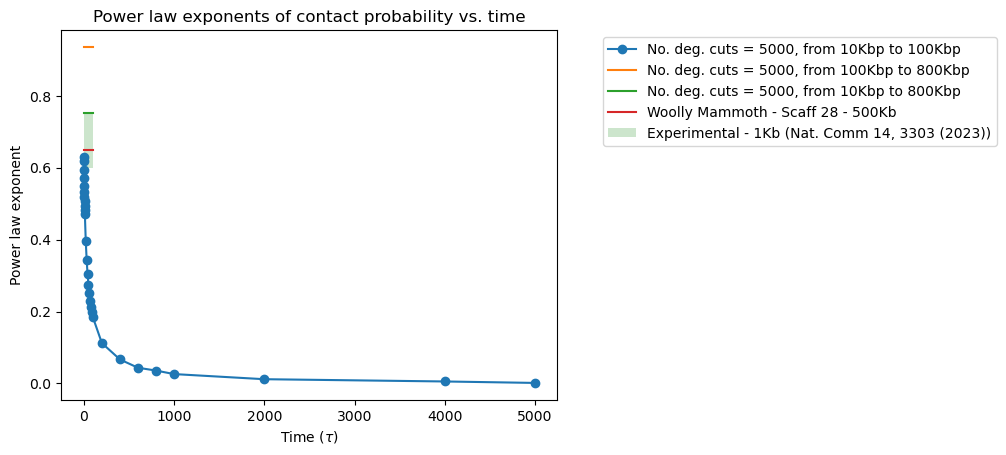

In [45]:
degrade_legend = ['No. deg. cuts = '+str(5000)+', from 10Kbp to 100Kbp', 'No. deg. cuts = '+str(5000)+', from 100Kbp to 800Kbp', 'No. deg. cuts = '+str(5000)+', from 10Kbp to 800Kbp', 'Woolly Mammoth - Scaff 28 - 500Kb', 'Experimental - 1Kb (Nat. Comm 14, 3303 (2023))', 'Experimental - 1Kb (PNAS 112, 47 (2015))', 'Range of Typical Experimental Exponent Measurements']


plt.plot(iframes_5500, slope_5500_l_all, marker = 'o')
#plt.plot(iframes_5500, slope_5500_r, marker = 'o')
#plt.plot(iframes_5500, slope_5500_all, marker = 'o')

x = [0, 100]
y = np.abs([params_woolly[1],params_woolly[1]])
plt.plot(x, y)

x = [0, 100]
y = np.abs([params_exp[1],params_exp[1]])
plt.plot(x, y)

x_sanborn = [0, 100]
y_sanborn = [0.65,0.65]

plt.plot(x_sanborn, y_sanborn)

#plt.xlim([0,5500])
plt.ylabel('Power law exponent')
#plt.yscale("log")
#plt.xscale("log")
plt.title("Power law exponents of contact probability vs. time")
#plt.xlim([1,5500])
#plt.ylim([1e1,1e1])

y1 = 0.6
y2 = abs(params_exp[1])

plt.fill_between(x, y2=y2, y1=y1,  facecolor ='green', alpha = 0.2) 

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.9, 1.0))

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel('Time ('+r'$\tau$)')

plt.show()

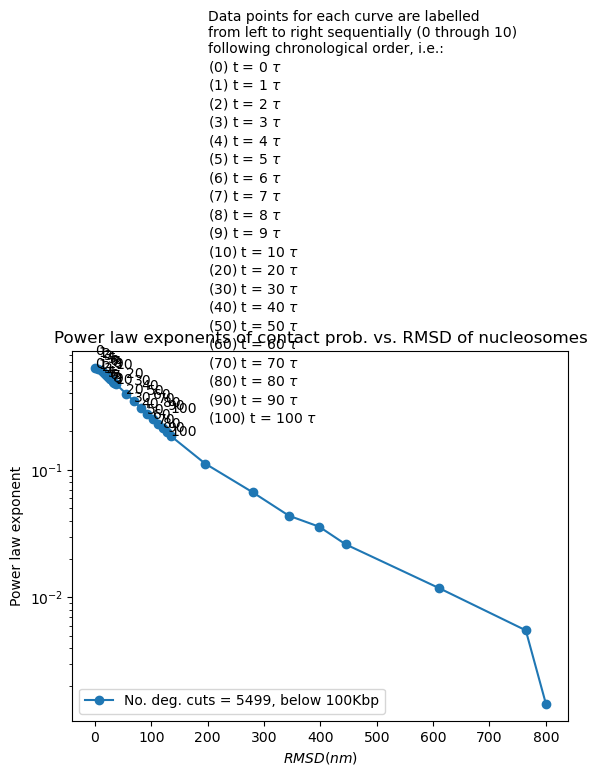

In [46]:
N_cuts    = [5500] 
No_N_cuts = len(N_cuts)
No_frames = len(iframes_5500)
degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp']

#plt.plot(msd_t_0000, slope_t_0000, marker = 'o')

plt.plot(10*np.sqrt(msd_5500), slope_5500_l_all, marker = 'o')
#plt.plot(10*np.sqrt(msd_5500), slope_5500_r, marker = 'o')


plt.legend(degrade_legend, loc='lower left') 
#plt.xlim([0,5500])
plt.ylabel('Power law exponent')
plt.yscale("log")
#plt.xscale("log")
plt.title("Power law exponents of contact prob. vs. RMSD of nucleosomes")
#plt.xlim([1,5500])
#plt.ylim([1e1,1e1])

data_point_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for i,j,k in zip(10*np.sqrt(msd_5500),slope_5500_l,data_point_labels):
    plt.text(i,j,k)
    
for i,j,k in zip(10*np.sqrt(msd_5500),slope_5500_r,data_point_labels):
    plt.text(i,j,k)
    
    
text = ("Data points for each curve are labelled" "\n" 
        "from left to right sequentially (0 through 10)" "\n" 
        "following chronological order, i.e.:" "\n"
       "(0) t = "+str(0)+r" $\tau$" "\n"
       "(1) t = "+str(1)+r" $\tau$" "\n"
       "(2) t = "+str(2)+r" $\tau$" "\n"
       "(3) t = "+str(3)+r" $\tau$" "\n"
       "(4) t = "+str(4)+r" $\tau$" "\n"
       "(5) t = "+str(5)+r" $\tau$" "\n"
       "(6) t = "+str(6)+r" $\tau$" "\n"
       "(7) t = "+str(7)+r" $\tau$" "\n"
       "(8) t = "+str(8)+r" $\tau$" "\n"
       "(9) t = "+str(9)+r" $\tau$" "\n"
       "(10) t = "+str(10)+r" $\tau$" "\n"
       "(20) t = "+str(20)+r" $\tau$" "\n"
       "(30) t = "+str(30)+r" $\tau$" "\n"
       "(40) t = "+str(40)+r" $\tau$" "\n"
       "(50) t = "+str(50)+r" $\tau$" "\n"
       "(60) t = "+str(60)+r" $\tau$" "\n"
       "(70) t = "+str(70)+r" $\tau$" "\n"
       "(80) t = "+str(80)+r" $\tau$" "\n"
       "(90) t = "+str(90)+r" $\tau$" "\n"
       "(100) t = "+str(100)+r" $\tau$" "\n"
       )

plt.text(200, 0.18, text, wrap=True)

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel(r'$RMSD (nm)$')

plt.show()

In [47]:
print(iframes_5500[20:23])
print(10*np.sqrt(msd_5500)[20:23])

[199, 399, 599]
[195.19907204 279.72661723 344.057105  ]


In [48]:
slope_5500_l_all

array([0.63070613, 0.61925616, 0.59398276, 0.57134397, 0.55017518,
       0.53335027, 0.51966965, 0.50634199, 0.49317437, 0.48305576,
       0.47236046, 0.3959464 , 0.34422016, 0.30365253, 0.27406277,
       0.25242942, 0.22957662, 0.21223381, 0.1986756 , 0.18410879,
       0.11215618, 0.06670791, 0.04367526, 0.03580124, 0.02606399,
       0.0117985 , 0.00550665, 0.00145737])

In [49]:
#Transformation between average Euclidean distances between pairs of loci and their corresponding genomic distances

x_coords = []
y_coords = []
average_vals = []
std_dev_vals = []

for idiag in range(1, 5500):
    
    diagonal = np.diagonal(dist_map_5500_0_tau[0], idiag)
    average  = np.mean(diagonal)
    std_dev  = np.std(diagonal)
    average_vals.append(average)
    std_dev_vals.append(std_dev)
    
    len_diagonal = len(diagonal)
    
    for ipair in range(len_diagonal):
        
        x_coords.append(idiag)
        y_coords.append(diagonal[ipair])

bp_vals = np.arange(1,5500)
average_vals = np.array(average_vals)
std_dev_vals = np.array(std_dev_vals)

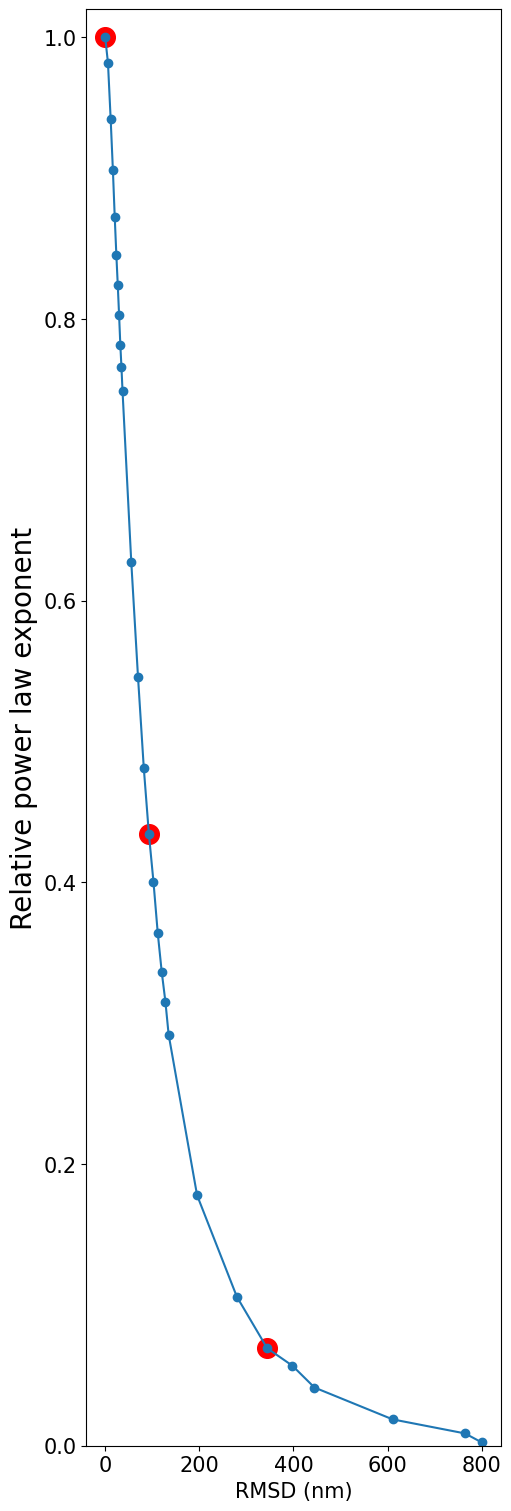

In [50]:
#PLOT FOR OLGA-EREZ PAPER / WOOLLY MAMMOTH
#t=600tau

import matplotlib.ticker as ticker

N_cuts    = [5500] 
No_N_cuts = len(N_cuts)
No_frames = len(iframes_5500)
degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp']

fig, ax = plt.subplots(layout='constrained')

#plt.plot(msd_t_0000, slope_t_0000, marker = 'o')

#Relative to undegraded structures
reduced_units_exp = slope_5500_l_all/slope_5500_l_all[0]

#Relative changes (percentage) with respect to undegraded structure
reduced_units_exp_relchange = abs((slope_5500_l_all - slope_5500_l_all[0])/slope_5500_l_all[0])

#Relative exponent measure where 1 corresponds to undegraded structures and 0 to structures at t=100tau
reduced_units_1to0 = slope_5500_l_all - slope_5500_l_all[-1]
reduced_units_1to0 = reduced_units_1to0/reduced_units_1to0[0]

#Points to highlight
highlight_x = [msd_5500[0],msd_5500[14],msd_5500[22]] #msd_5500[19]]
highlight_y = [reduced_units_exp[0],reduced_units_exp[14],reduced_units_exp[22]] #reduced_units_exp[19]]

ax.plot(10*np.sqrt(msd_5500), reduced_units_exp, marker = 'o')

ax.scatter(10*np.sqrt(highlight_x), highlight_y, marker = 'o', color='r', s=200)

#ax.set_ylabel('Power law exponent relative to native chromosome structures')
ax.set_ylabel('Relative power law exponent', size=20)
ax.set_xlabel('Relative power law exponent', size=20)
#plt.yscale("log")


bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def inverse(x):
    return np.interp(x, bp_axis, euc_axis)


def forward(x):
    return np.interp(x, euc_axis, bp_axis)


#secax = ax.secondary_xaxis(0.0, functions=(forward, inverse)) #, direction="in") # , pad=-15)
##secax.xaxis.set_minor_locator(AutoMinorLocator())
##secax.set_xlabel('Genomic Distance (bp)')

##secax.set_xlabel('Genomic Distance (bp)', size=15)
#secax.tick_params(axis="x",direction="in", pad=-15)

#GenDistLabel = (r'Genomic Distance ($10^3$ bp)')
#plt.text(25, 0.02, GenDistLabel, wrap=True, size=15)

#secax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#secax.xaxis.offsetText.set_fontsize(15)
##secax.xticks(np.range(1000,8000, step=1000))

fig.set_figheight(15)
fig.set_figwidth(5)

plt.ylim([0.,1.02])

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel(r'RMSD (nm)', size=15)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
#secax.tick_params(labelsize=15)

#secax.xaxis.set_label_coords(0.5,100.95)


#a=secax.get_xticks().tolist()
#a = ["  0", 2, 4, 6, 8, 1]
#secax.set_xticklabels(a)

#text = ("Relative change \nof decay exponent")
#plt.text(50, 0.85, text, wrap=True, size=20)

#left, bottom, width, height = [0.3, 0.20, 0.55, 0.1]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.plot(200*bp_vals, 10*average_vals)
#ax2.fill_between(200*bp_vals, 10*(average_vals+std_dev_vals), 10*(average_vals-std_dev_vals), color='g',alpha=0.5)
#ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#ax2.set_xlim([0,200000])

#b=ax2.get_xticks().tolist()
#b = ["0.0", "0.5", "1.0", "1.5", "2.0"]
#ax2.set_xticklabels(b)

#ax2.set_ylabel('Mean Euclidean Distance (nm)', size=12)
#ax2.set_xlabel(r'Genomic Distance ($10^5$ bp)', size=12)
#ax2.title('Mean Eucledian Distance for Loci Pairs in Undegraded Structure vs. Genomic Distance')

plt.show()

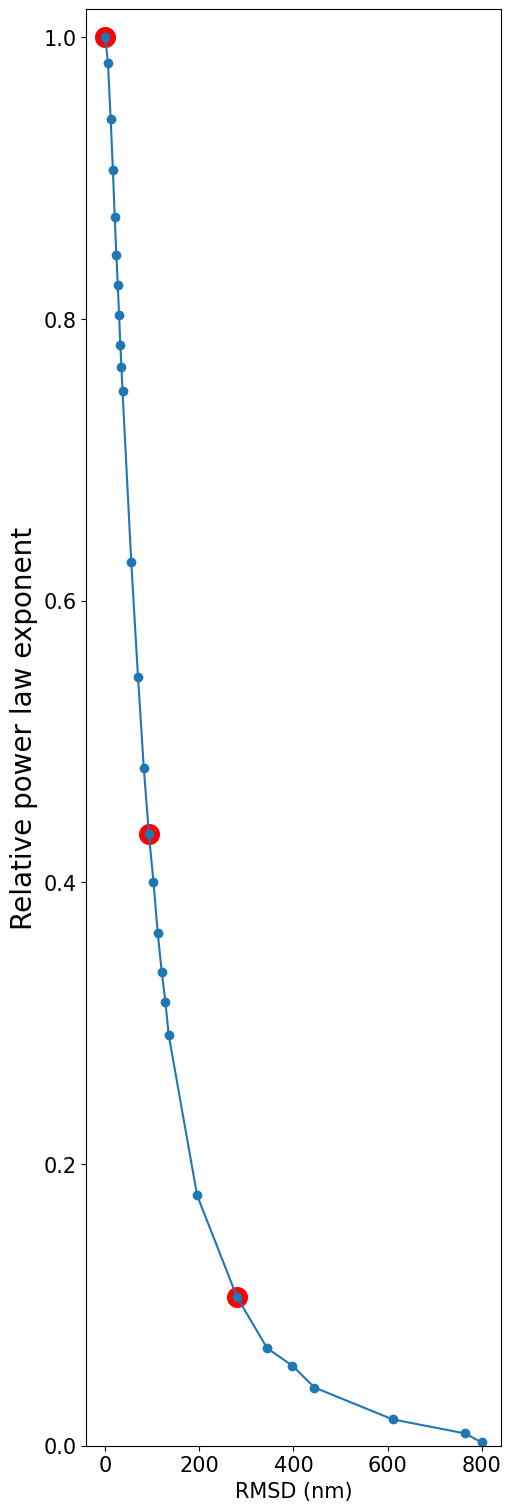

In [51]:
#PLOT FOR OLGA-EREZ PAPER / WOOLLY MAMMOTH
#t=400tau

import matplotlib.ticker as ticker

N_cuts    = [5500] 
No_N_cuts = len(N_cuts)
No_frames = len(iframes_5500)
degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp']

fig, ax = plt.subplots(layout='constrained')

#plt.plot(msd_t_0000, slope_t_0000, marker = 'o')

#Relative to undegraded structures
reduced_units_exp = slope_5500_l_all/slope_5500_l_all[0]

#Relative changes (percentage) with respect to undegraded structure
reduced_units_exp_relchange = abs((slope_5500_l_all - slope_5500_l_all[0])/slope_5500_l_all[0])

#Relative exponent measure where 1 corresponds to undegraded structures and 0 to structures at t=100tau
reduced_units_1to0 = slope_5500_l_all - slope_5500_l_all[-1]
reduced_units_1to0 = reduced_units_1to0/reduced_units_1to0[0]

#Points to highlight
highlight_x = [msd_5500[0],msd_5500[14],msd_5500[21]] #msd_5500[19]]
highlight_y = [reduced_units_exp[0],reduced_units_exp[14],reduced_units_exp[21]] #reduced_units_exp[19]]

ax.plot(10*np.sqrt(msd_5500), reduced_units_exp, marker = 'o')

ax.scatter(10*np.sqrt(highlight_x), highlight_y, marker = 'o', color='r', s=200)

#ax.set_ylabel('Power law exponent relative to native chromosome structures')
ax.set_ylabel('Relative power law exponent', size=20)
ax.set_xlabel('Relative power law exponent', size=20)
#plt.yscale("log")


bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def inverse(x):
    return np.interp(x, bp_axis, euc_axis)


def forward(x):
    return np.interp(x, euc_axis, bp_axis)


#secax = ax.secondary_xaxis(0.0, functions=(forward, inverse)) #, direction="in") # , pad=-15)
##secax.xaxis.set_minor_locator(AutoMinorLocator())
##secax.set_xlabel('Genomic Distance (bp)')

##secax.set_xlabel('Genomic Distance (bp)', size=15)
#secax.tick_params(axis="x",direction="in", pad=-15)

#GenDistLabel = (r'Genomic Distance ($10^3$ bp)')
#plt.text(25, 0.02, GenDistLabel, wrap=True, size=15)

#secax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#secax.xaxis.offsetText.set_fontsize(15)
##secax.xticks(np.range(1000,8000, step=1000))

fig.set_figheight(15)
fig.set_figwidth(5)

plt.ylim([0.,1.02])

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel(r'RMSD (nm)', size=15)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
#secax.tick_params(labelsize=15)

#secax.xaxis.set_label_coords(0.5,100.95)


#a=secax.get_xticks().tolist()
#a = ["  0", 2, 4, 6, 8, 1]
#secax.set_xticklabels(a)

#text = ("Relative change \nof decay exponent")
#plt.text(50, 0.85, text, wrap=True, size=20)

#left, bottom, width, height = [0.3, 0.20, 0.55, 0.1]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.plot(200*bp_vals, 10*average_vals)
#ax2.fill_between(200*bp_vals, 10*(average_vals+std_dev_vals), 10*(average_vals-std_dev_vals), color='g',alpha=0.5)
#ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#ax2.set_xlim([0,200000])

#b=ax2.get_xticks().tolist()
#b = ["0.0", "0.5", "1.0", "1.5", "2.0"]
#ax2.set_xticklabels(b)

#ax2.set_ylabel('Mean Euclidean Distance (nm)', size=12)
#ax2.set_xlabel(r'Genomic Distance ($10^5$ bp)', size=12)
#ax2.title('Mean Eucledian Distance for Loci Pairs in Undegraded Structure vs. Genomic Distance')

plt.show()

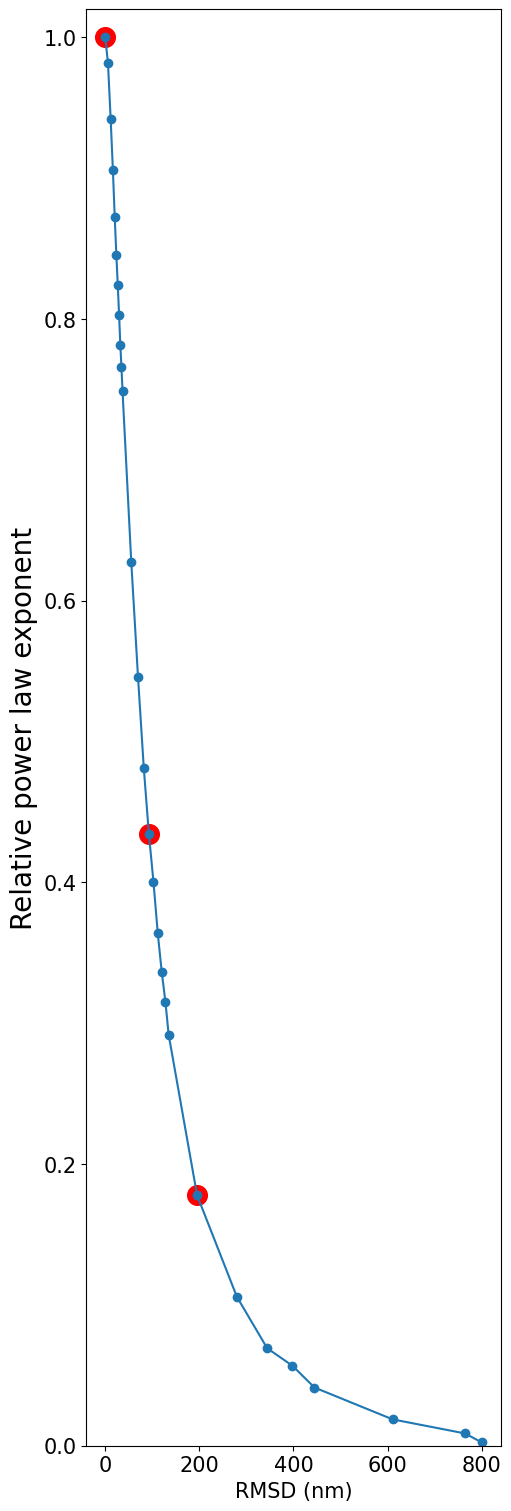

In [52]:
#PLOT FOR OLGA-EREZ PAPER / WOOLLY MAMMOTH
#t=200tau

import matplotlib.ticker as ticker

N_cuts    = [5500] 
No_N_cuts = len(N_cuts)
No_frames = len(iframes_5500)
degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp']

fig, ax = plt.subplots(layout='constrained')

#plt.plot(msd_t_0000, slope_t_0000, marker = 'o')

#Relative to undegraded structures
reduced_units_exp = slope_5500_l_all/slope_5500_l_all[0]

#Relative changes (percentage) with respect to undegraded structure
reduced_units_exp_relchange = abs((slope_5500_l_all - slope_5500_l_all[0])/slope_5500_l_all[0])

#Relative exponent measure where 1 corresponds to undegraded structures and 0 to structures at t=100tau
reduced_units_1to0 = slope_5500_l_all - slope_5500_l_all[-1]
reduced_units_1to0 = reduced_units_1to0/reduced_units_1to0[0]

#Points to highlight
highlight_x = [msd_5500[0],msd_5500[14],msd_5500[20]] #msd_5500[19]]
highlight_y = [reduced_units_exp[0],reduced_units_exp[14],reduced_units_exp[20]] #reduced_units_exp[19]]

ax.plot(10*np.sqrt(msd_5500), reduced_units_exp, marker = 'o')

ax.scatter(10*np.sqrt(highlight_x), highlight_y, marker = 'o', color='r', s=200)

#ax.set_ylabel('Power law exponent relative to native chromosome structures')
ax.set_ylabel('Relative power law exponent', size=20)
ax.set_xlabel('Relative power law exponent', size=20)
#plt.yscale("log")


bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def inverse(x):
    return np.interp(x, bp_axis, euc_axis)


def forward(x):
    return np.interp(x, euc_axis, bp_axis)


#secax = ax.secondary_xaxis(0.0, functions=(forward, inverse)) #, direction="in") # , pad=-15)
##secax.xaxis.set_minor_locator(AutoMinorLocator())
##secax.set_xlabel('Genomic Distance (bp)')

##secax.set_xlabel('Genomic Distance (bp)', size=15)
#secax.tick_params(axis="x",direction="in", pad=-15)

#GenDistLabel = (r'Genomic Distance ($10^3$ bp)')
#plt.text(25, 0.02, GenDistLabel, wrap=True, size=15)

#secax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#secax.xaxis.offsetText.set_fontsize(15)
##secax.xticks(np.range(1000,8000, step=1000))

fig.set_figheight(15)
fig.set_figwidth(5)

plt.ylim([0.,1.02])

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel(r'RMSD (nm)', size=15)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
#secax.tick_params(labelsize=15)

#secax.xaxis.set_label_coords(0.5,100.95)


#a=secax.get_xticks().tolist()
#a = ["  0", 2, 4, 6, 8, 1]
#secax.set_xticklabels(a)

#text = ("Relative change \nof decay exponent")
#plt.text(50, 0.85, text, wrap=True, size=20)

#left, bottom, width, height = [0.3, 0.20, 0.55, 0.1]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.plot(200*bp_vals, 10*average_vals)
#ax2.fill_between(200*bp_vals, 10*(average_vals+std_dev_vals), 10*(average_vals-std_dev_vals), color='g',alpha=0.5)
#ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#ax2.set_xlim([0,200000])

#b=ax2.get_xticks().tolist()
#b = ["0.0", "0.5", "1.0", "1.5", "2.0"]
#ax2.set_xticklabels(b)

#ax2.set_ylabel('Mean Euclidean Distance (nm)', size=12)
#ax2.set_xlabel(r'Genomic Distance ($10^5$ bp)', size=12)
#ax2.title('Mean Eucledian Distance for Loci Pairs in Undegraded Structure vs. Genomic Distance')

plt.show()

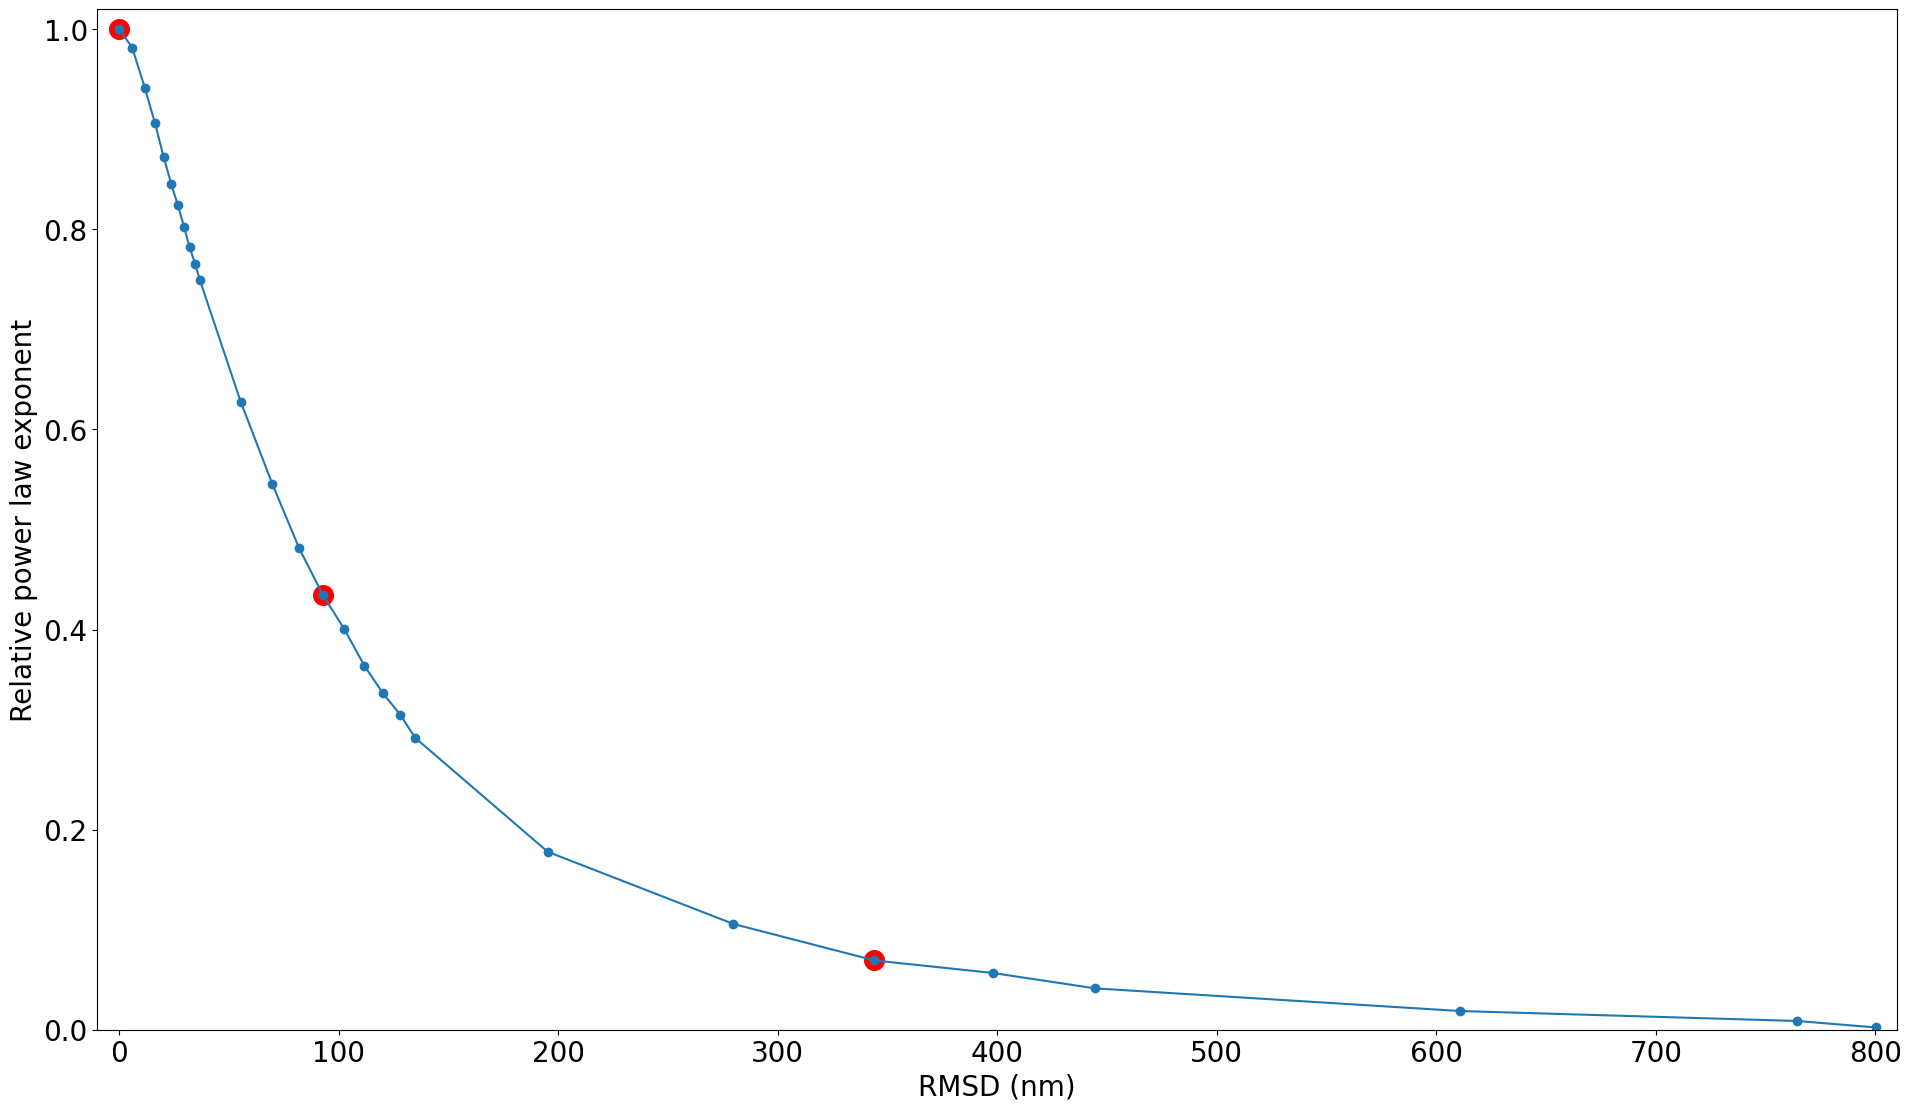

In [53]:
#PLOT FOR OLGA-EREZ PAPER / WOOLLY MAMMOTH
#t=600tau

import matplotlib.ticker as ticker

N_cuts    = [5500] 
No_N_cuts = len(N_cuts)
No_frames = len(iframes_5500)
degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp']

fig, ax = plt.subplots(layout='constrained')

#plt.plot(msd_t_0000, slope_t_0000, marker = 'o')

#Relative to undegraded structures
reduced_units_exp = slope_5500_l_all/slope_5500_l_all[0]

#Relative changes (percentage) with respect to undegraded structure
reduced_units_exp_relchange = abs((slope_5500_l_all - slope_5500_l_all[0])/slope_5500_l_all[0])

#Relative exponent measure where 1 corresponds to undegraded structures and 0 to structures at t=100tau
reduced_units_1to0 = slope_5500_l_all - slope_5500_l_all[-1]
reduced_units_1to0 = reduced_units_1to0/reduced_units_1to0[0]

#Points to highlight
highlight_x = [msd_5500[0],msd_5500[14],msd_5500[22]] #msd_5500[19]]
highlight_y = [reduced_units_exp[0],reduced_units_exp[14],reduced_units_exp[22]] #reduced_units_exp[19]]

ax.plot(10*np.sqrt(msd_5500), reduced_units_exp, marker = 'o')

ax.scatter(10*np.sqrt(highlight_x), highlight_y, marker = 'o', color='r', s=200)

#ax.set_ylabel('Power law exponent relative to native chromosome structures')
ax.set_ylabel('Relative power law exponent', size=20)
ax.set_xlabel('Relative power law exponent', size=20)
#plt.yscale("log")


bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def inverse(x):
    return np.interp(x, bp_axis, euc_axis)


def forward(x):
    return np.interp(x, euc_axis, bp_axis)


#secax = ax.secondary_xaxis(0.0, functions=(forward, inverse)) #, direction="in") # , pad=-15)
##secax.xaxis.set_minor_locator(AutoMinorLocator())
##secax.set_xlabel('Genomic Distance (bp)')

##secax.set_xlabel('Genomic Distance (bp)', size=15)
#secax.tick_params(axis="x",direction="in", pad=-15)

#GenDistLabel = (r'Genomic Distance ($10^3$ bp)')
#plt.text(25, 0.02, GenDistLabel, wrap=True, size=15)

#secax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#secax.xaxis.offsetText.set_fontsize(15)
##secax.xticks(np.range(1000,8000, step=1000))

fig.set_figheight(11)
fig.set_figwidth(19)

plt.ylim([0.,1.02])
plt.xlim([-10,810])

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel(r'RMSD (nm)', size=20)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
#secax.tick_params(labelsize=15)

#secax.xaxis.set_label_coords(0.5,100.95)


#a=secax.get_xticks().tolist()
#a = ["  0", 2, 4, 6, 8, 1]
#secax.set_xticklabels(a)

#text = ("Relative change \nof decay exponent")
#plt.text(50, 0.85, text, wrap=True, size=20)

#left, bottom, width, height = [0.3, 0.20, 0.55, 0.1]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.plot(200*bp_vals, 10*average_vals)
#ax2.fill_between(200*bp_vals, 10*(average_vals+std_dev_vals), 10*(average_vals-std_dev_vals), color='g',alpha=0.5)
#ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#ax2.set_xlim([0,200000])

#b=ax2.get_xticks().tolist()
#b = ["0.0", "0.5", "1.0", "1.5", "2.0"]
#ax2.set_xticklabels(b)

#ax2.set_ylabel('Mean Euclidean Distance (nm)', size=12)
#ax2.set_xlabel(r'Genomic Distance ($10^5$ bp)', size=12)
#ax2.title('Mean Eucledian Distance for Loci Pairs in Undegraded Structure vs. Genomic Distance')

plt.show()

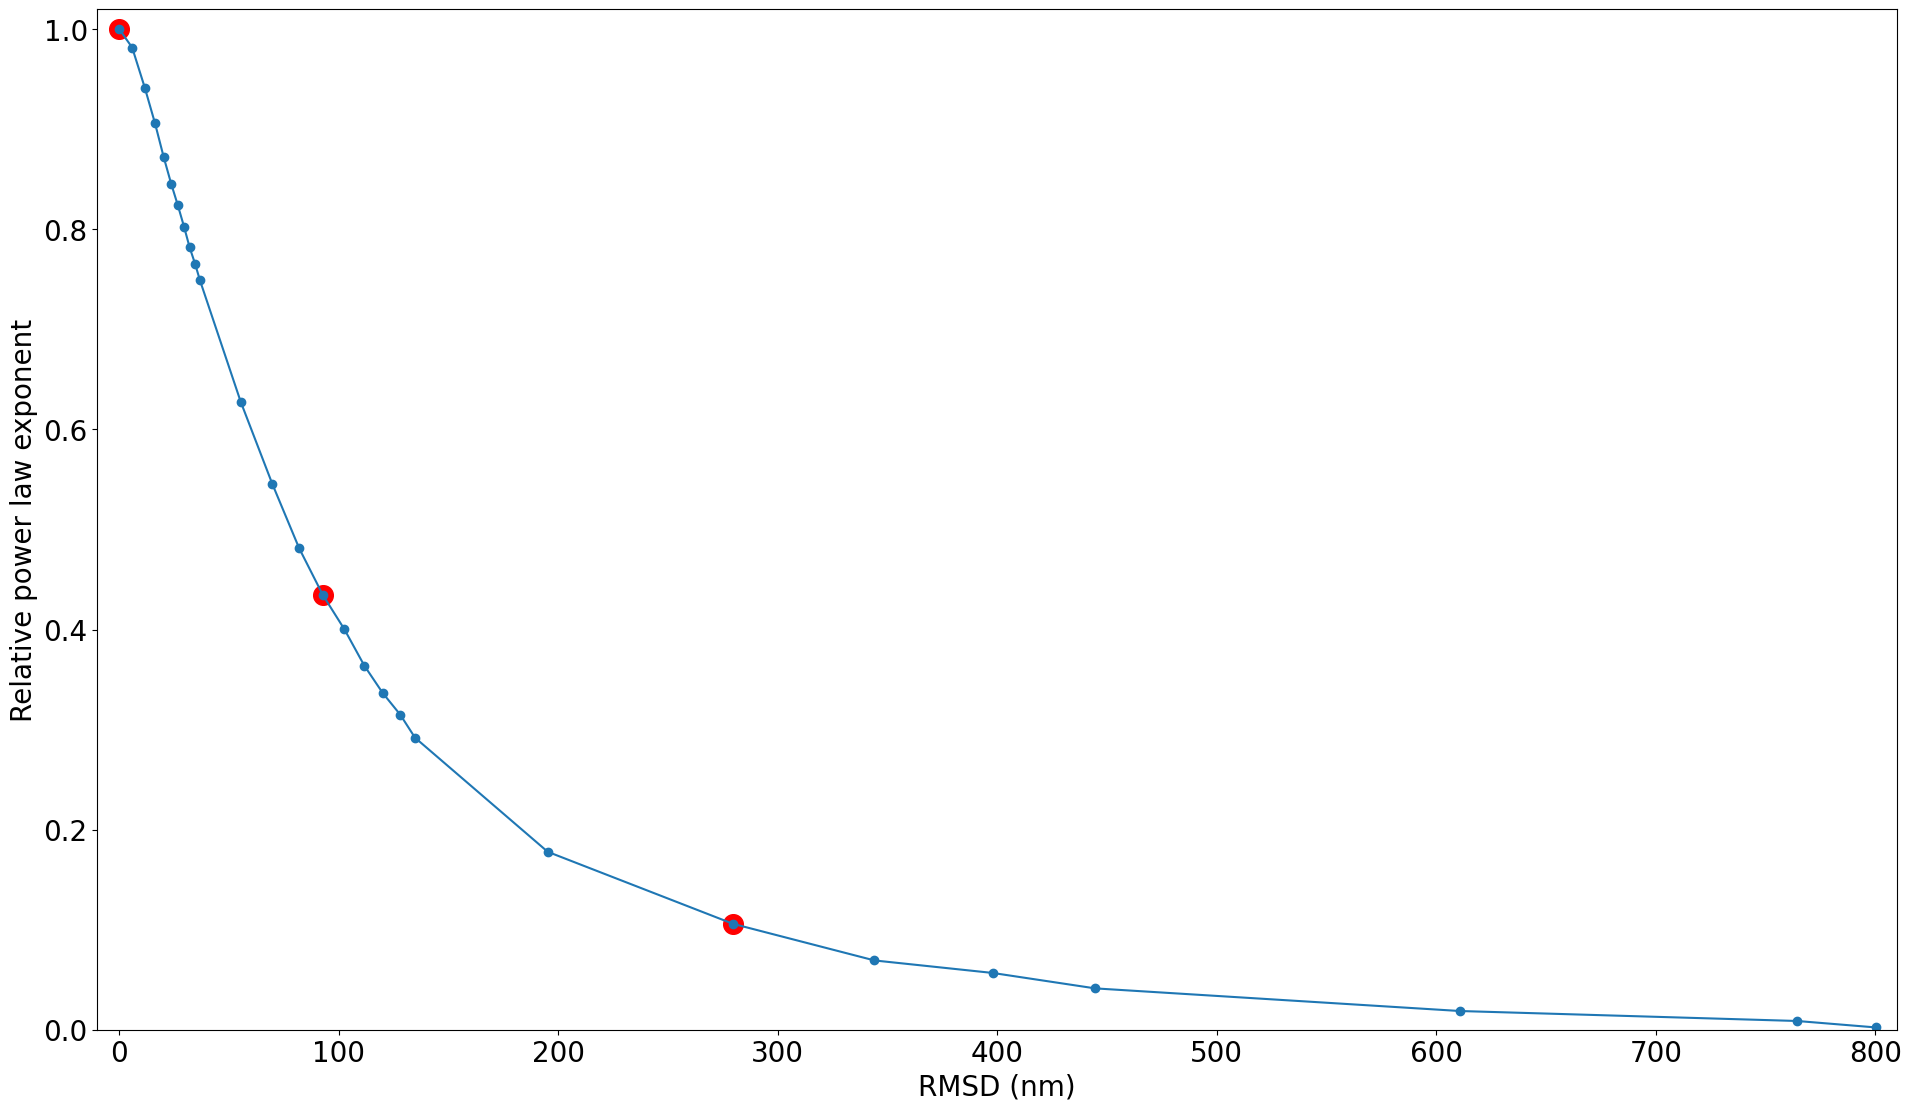

In [54]:
#PLOT FOR OLGA-EREZ PAPER / WOOLLY MAMMOTH
#t=600tau

import matplotlib.ticker as ticker

N_cuts    = [5500] 
No_N_cuts = len(N_cuts)
No_frames = len(iframes_5500)
degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp']

fig, ax = plt.subplots(layout='constrained')

#plt.plot(msd_t_0000, slope_t_0000, marker = 'o')

#Relative to undegraded structures
reduced_units_exp = slope_5500_l_all/slope_5500_l_all[0]

#Relative changes (percentage) with respect to undegraded structure
reduced_units_exp_relchange = abs((slope_5500_l_all - slope_5500_l_all[0])/slope_5500_l_all[0])

#Relative exponent measure where 1 corresponds to undegraded structures and 0 to structures at t=100tau
reduced_units_1to0 = slope_5500_l_all - slope_5500_l_all[-1]
reduced_units_1to0 = reduced_units_1to0/reduced_units_1to0[0]

#Points to highlight
highlight_x = [msd_5500[0],msd_5500[14],msd_5500[21]] #msd_5500[19]]
highlight_y = [reduced_units_exp[0],reduced_units_exp[14],reduced_units_exp[21]] #reduced_units_exp[19]]

ax.plot(10*np.sqrt(msd_5500), reduced_units_exp, marker = 'o')

ax.scatter(10*np.sqrt(highlight_x), highlight_y, marker = 'o', color='r', s=200)

#ax.set_ylabel('Power law exponent relative to native chromosome structures')
ax.set_ylabel('Relative power law exponent', size=20)
ax.set_xlabel('Relative power law exponent', size=20)
#plt.yscale("log")


bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def inverse(x):
    return np.interp(x, bp_axis, euc_axis)


def forward(x):
    return np.interp(x, euc_axis, bp_axis)


#secax = ax.secondary_xaxis(0.0, functions=(forward, inverse)) #, direction="in") # , pad=-15)
##secax.xaxis.set_minor_locator(AutoMinorLocator())
##secax.set_xlabel('Genomic Distance (bp)')

##secax.set_xlabel('Genomic Distance (bp)', size=15)
#secax.tick_params(axis="x",direction="in", pad=-15)

#GenDistLabel = (r'Genomic Distance ($10^3$ bp)')
#plt.text(25, 0.02, GenDistLabel, wrap=True, size=15)

#secax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#secax.xaxis.offsetText.set_fontsize(15)
##secax.xticks(np.range(1000,8000, step=1000))

fig.set_figheight(11)
fig.set_figwidth(19)

plt.ylim([0.,1.02])
plt.xlim([-10,810])

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel(r'RMSD (nm)', size=20)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
#secax.tick_params(labelsize=15)

#secax.xaxis.set_label_coords(0.5,100.95)


#a=secax.get_xticks().tolist()
#a = ["  0", 2, 4, 6, 8, 1]
#secax.set_xticklabels(a)

#text = ("Relative change \nof decay exponent")
#plt.text(50, 0.85, text, wrap=True, size=20)

#left, bottom, width, height = [0.3, 0.20, 0.55, 0.1]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.plot(200*bp_vals, 10*average_vals)
#ax2.fill_between(200*bp_vals, 10*(average_vals+std_dev_vals), 10*(average_vals-std_dev_vals), color='g',alpha=0.5)
#ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#ax2.set_xlim([0,200000])

#b=ax2.get_xticks().tolist()
#b = ["0.0", "0.5", "1.0", "1.5", "2.0"]
#ax2.set_xticklabels(b)

#ax2.set_ylabel('Mean Euclidean Distance (nm)', size=12)
#ax2.set_xlabel(r'Genomic Distance ($10^5$ bp)', size=12)
#ax2.title('Mean Eucledian Distance for Loci Pairs in Undegraded Structure vs. Genomic Distance')

plt.show()

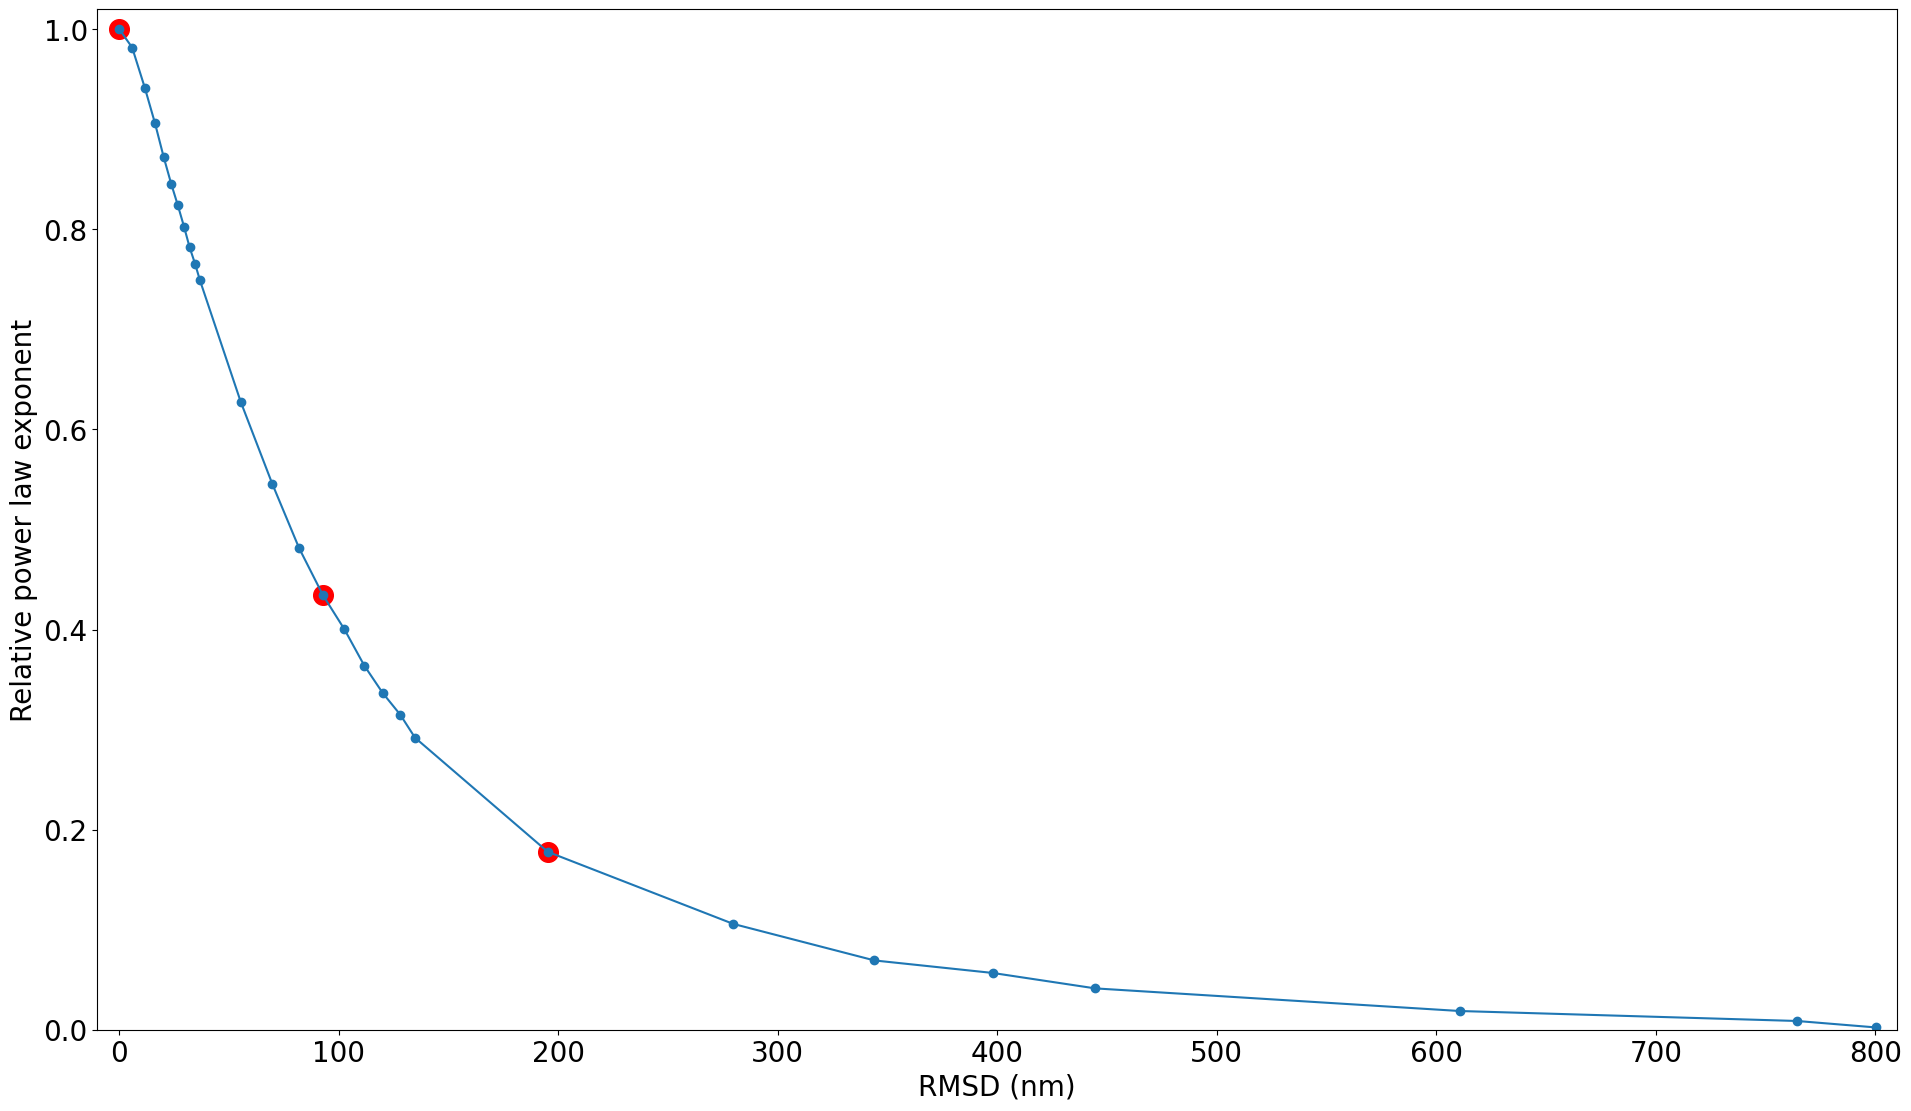

In [55]:
#PLOT FOR OLGA-EREZ PAPER / WOOLLY MAMMOTH
#t=600tau

import matplotlib.ticker as ticker

N_cuts    = [5500] 
No_N_cuts = len(N_cuts)
No_frames = len(iframes_5500)
degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp']

fig, ax = plt.subplots(layout='constrained')

#plt.plot(msd_t_0000, slope_t_0000, marker = 'o')

#Relative to undegraded structures
reduced_units_exp = slope_5500_l_all/slope_5500_l_all[0]

#Relative changes (percentage) with respect to undegraded structure
reduced_units_exp_relchange = abs((slope_5500_l_all - slope_5500_l_all[0])/slope_5500_l_all[0])

#Relative exponent measure where 1 corresponds to undegraded structures and 0 to structures at t=100tau
reduced_units_1to0 = slope_5500_l_all - slope_5500_l_all[-1]
reduced_units_1to0 = reduced_units_1to0/reduced_units_1to0[0]

#Points to highlight
highlight_x = [msd_5500[0],msd_5500[14],msd_5500[20]] #msd_5500[19]]
highlight_y = [reduced_units_exp[0],reduced_units_exp[14],reduced_units_exp[20]] #reduced_units_exp[19]]

ax.plot(10*np.sqrt(msd_5500), reduced_units_exp, marker = 'o')

ax.scatter(10*np.sqrt(highlight_x), highlight_y, marker = 'o', color='r', s=200)

#ax.set_ylabel('Power law exponent relative to native chromosome structures')
ax.set_ylabel('Relative power law exponent', size=20)
ax.set_xlabel('Relative power law exponent', size=20)
#plt.yscale("log")


bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def inverse(x):
    return np.interp(x, bp_axis, euc_axis)


def forward(x):
    return np.interp(x, euc_axis, bp_axis)


#secax = ax.secondary_xaxis(0.0, functions=(forward, inverse)) #, direction="in") # , pad=-15)
##secax.xaxis.set_minor_locator(AutoMinorLocator())
##secax.set_xlabel('Genomic Distance (bp)')

##secax.set_xlabel('Genomic Distance (bp)', size=15)
#secax.tick_params(axis="x",direction="in", pad=-15)

#GenDistLabel = (r'Genomic Distance ($10^3$ bp)')
#plt.text(25, 0.02, GenDistLabel, wrap=True, size=15)

#secax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#secax.xaxis.offsetText.set_fontsize(15)
##secax.xticks(np.range(1000,8000, step=1000))

fig.set_figheight(11)
fig.set_figwidth(19)

plt.ylim([0.,1.02])
plt.xlim([-10,810])

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel(r'RMSD (nm)', size=20)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
#secax.tick_params(labelsize=15)

#secax.xaxis.set_label_coords(0.5,100.95)


#a=secax.get_xticks().tolist()
#a = ["  0", 2, 4, 6, 8, 1]
#secax.set_xticklabels(a)

#text = ("Relative change \nof decay exponent")
#plt.text(50, 0.85, text, wrap=True, size=20)

#left, bottom, width, height = [0.3, 0.20, 0.55, 0.1]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.plot(200*bp_vals, 10*average_vals)
#ax2.fill_between(200*bp_vals, 10*(average_vals+std_dev_vals), 10*(average_vals-std_dev_vals), color='g',alpha=0.5)
#ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#ax2.set_xlim([0,200000])

#b=ax2.get_xticks().tolist()
#b = ["0.0", "0.5", "1.0", "1.5", "2.0"]
#ax2.set_xticklabels(b)

#ax2.set_ylabel('Mean Euclidean Distance (nm)', size=12)
#ax2.set_xlabel(r'Genomic Distance ($10^5$ bp)', size=12)
#ax2.title('Mean Eucledian Distance for Loci Pairs in Undegraded Structure vs. Genomic Distance')

plt.show()

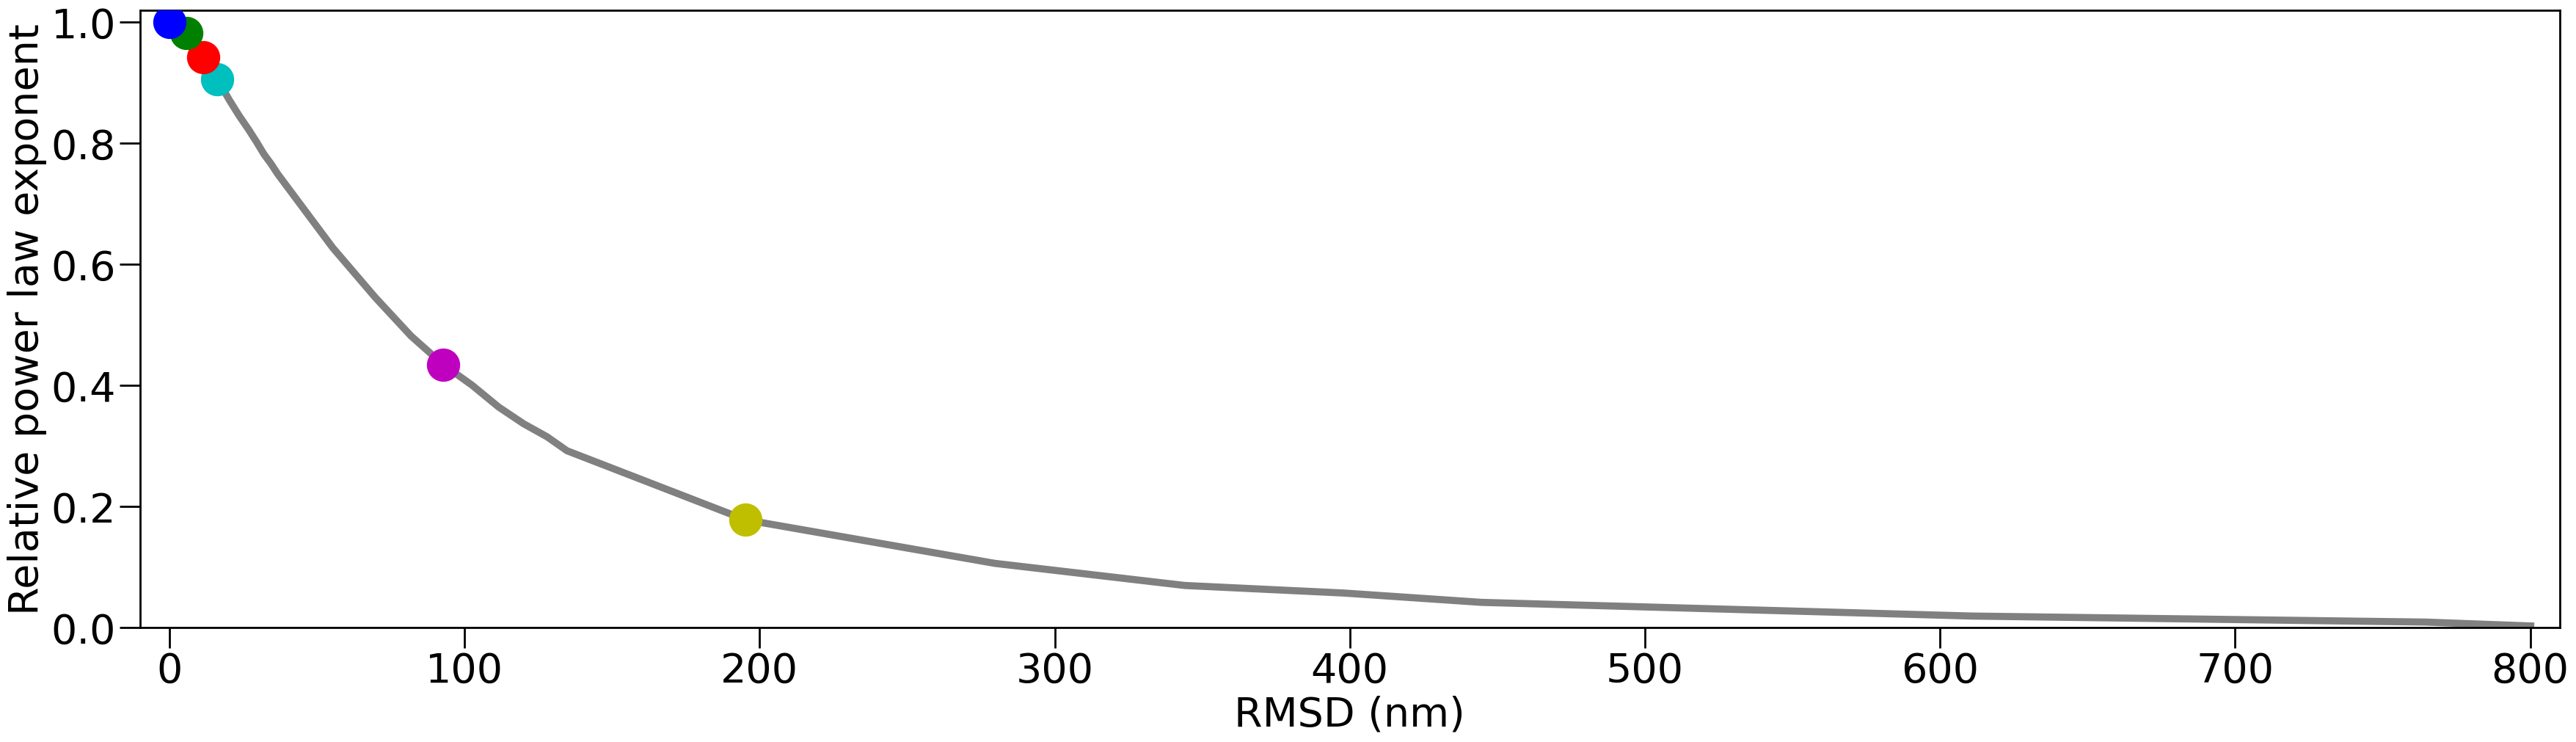

In [56]:
#PLOT FOR OLGA-EREZ PAPER / WOOLLY MAMMOTH
#t=600tau

import matplotlib.ticker as ticker

N_cuts    = [5500] 
No_N_cuts = len(N_cuts)
No_frames = len(iframes_5500)
degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp']

fig, ax = plt.subplots(layout='constrained')

#plt.plot(msd_t_0000, slope_t_0000, marker = 'o')

#Relative to undegraded structures
reduced_units_exp = slope_5500_l_all/slope_5500_l_all[0]

#Relative changes (percentage) with respect to undegraded structure
reduced_units_exp_relchange = abs((slope_5500_l_all - slope_5500_l_all[0])/slope_5500_l_all[0])

#Relative exponent measure where 1 corresponds to undegraded structures and 0 to structures at t=100tau
reduced_units_1to0 = slope_5500_l_all - slope_5500_l_all[-1]
reduced_units_1to0 = reduced_units_1to0/reduced_units_1to0[0]

#Points to highlight
#highlight_x = [msd_5500[0],msd_5500[14],msd_5500[20]] #msd_5500[19]]
#highlight_y = [reduced_units_exp[0],reduced_units_exp[14],reduced_units_exp[20]] #reduced_units_exp[19]]

ax.plot(10*np.sqrt(msd_5500), reduced_units_exp, linewidth=7.0, color='gray', zorder = 0) #, marker = 'o')

ax.scatter(10*np.sqrt(msd_5500[0]), reduced_units_exp[0], marker = 'o', color='b', s=1000, zorder = 6)
ax.scatter(10*np.sqrt(msd_5500[1]), reduced_units_exp[1], marker = 'o', color='g', s=1000, zorder = 5)
ax.scatter(10*np.sqrt(msd_5500[2]), reduced_units_exp[2], marker = 'o', color='r', s=1000, zorder = 4)
ax.scatter(10*np.sqrt(msd_5500[3]), reduced_units_exp[3], marker = 'o', color='c', s=1000, zorder = 3)
ax.scatter(10*np.sqrt(msd_5500[14]), reduced_units_exp[14], marker = 'o', color='m', s=1000, zorder = 2)
ax.scatter(10*np.sqrt(msd_5500[20]), reduced_units_exp[20], marker = 'o', color='y', s=1000, zorder = 1)

#ax.set_ylabel('Power law exponent relative to native chromosome structures')
ax.set_ylabel('Relative power law exponent', size=40)

#plt.yscale("log")

bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def inverse(x):
    return np.interp(x, bp_axis, euc_axis)


def forward(x):
    return np.interp(x, euc_axis, bp_axis)

fig.set_figheight(10)
fig.set_figwidth(35)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    
ax.tick_params(width=2)

plt.ylim([0.,1.02])
plt.xlim([-10,810])

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel(r'RMSD (nm)', size=40)

plt.tick_params(axis='both', length=20, which='major', labelsize=40)
plt.tick_params(axis='both', length=20, which='minor', labelsize=40)

plt.show()

In [148]:
slope_5500_l_all

array([0.63070613, 0.61925616, 0.59398276, 0.57134397, 0.55017518,
       0.53335027, 0.51966965, 0.50634199, 0.49317437, 0.48305576,
       0.47236046, 0.3959464 , 0.34422016, 0.30365253, 0.27406277,
       0.25242942, 0.22957662, 0.21223381, 0.1986756 , 0.18410879,
       0.11215618, 0.06670791, 0.04367526, 0.03580124, 0.02606399,
       0.0117985 , 0.00550665, 0.00145737])

In [149]:
print(abs(params_RMSD10[1]), abs(params_RMSD50[1]),abs(params_RMSD100[1]),abs(params_RMSD150[1]),abs(params_RMSD200[1]))

0.5993842636103802 0.4154773319114557 0.2548813982819392 0.1606092325566425 0.1089460822074991


In [57]:
slope_5500_l_all_NEW = [0.63070613, 0.61925616, 0.5993842636103802, 0.59398276, 0.57134397, 0.55017518, 
       0.53335027, 0.51966965, 0.50634199, 0.49317437, 0.48305576, 
       0.47236046, 0.4154773319114557, 0.3959464 , 0.34422016, 0.30365253, 0.27406277, 0.2548813982819392, 
       0.25242942, 0.22957662, 0.21223381, 0.1986756 , 0.18410879, 0.1606092325566425, 
       0.11215618, 0.1089460822074991, 0.06670791, 0.04367526, 0.03580124, 0.02606399, 
       0.0117985 , 0.00550665, 0.00145737]
slope_5500_l_all_NEW = np.array(slope_5500_l_all_NEW)

In [58]:
for i in range(len(msd_5500_RMSD10)):
    print(i, iframes_5500_RMSD10[i], 10*np.sqrt(msd_5500_RMSD10[i]), msd_5500_RMSD10[i])

for i in range(len(msd_5500_RMSD50)):
    print(i, iframes_5500_RMSD50[i], 10*np.sqrt(msd_5500_RMSD50[i]), msd_5500_RMSD50[i])
    
for i in range(len(msd_5500_RMSD100)):
    print(i, iframes_5500_RMSD100[i], 10*np.sqrt(msd_5500_RMSD100[i]), msd_5500_RMSD100[i])
    
for i in range(len(msd_5500_RMSD150)):
    print(i, iframes_5500_RMSD150[i], 10*np.sqrt(msd_5500_RMSD150[i]), msd_5500_RMSD150[i])
    
for i in range(len(msd_5500_RMSD200)):
    print(i, iframes_5500_RMSD200[i], 10*np.sqrt(msd_5500_RMSD200[i]), msd_5500_RMSD200[i])


0 0 0.0 0.0
1 33 9.699769400591252 0.9408552642464638
2 34 9.977198450883796 0.9954448892831802
3 35 10.25168365897638 1.050970178437233
4 36 10.52323306739664 1.1073843419075011
5 37 10.791931062365956 1.1646577605485917
6 38 11.057810487163513 1.2227517277002335
7 39 11.320909072815436 1.2816298223495484
8 40 11.581257723884457 1.341255304670334
9 41 11.838878610126057 1.4015904674530029
10 42 12.093825208247733 1.4626060816764832
11 43 12.346156561728595 1.52427581846714
12 320 48.57745496482267 23.59769130859375
13 322 48.75439123007371 23.76990664215088
14 324 48.930768012453825 23.942200582885743
15 326 49.106560721718566 24.114543059158326
16 328 49.28188080146282 24.2870377532959
17 330 49.45673130533478 24.45968271408081
18 332 49.63104622201815 24.63240749092102
19 334 49.80473600602724 24.80511728630066
20 336 49.97788333561286 24.977888227081298
21 338 50.150589777253956 25.150816550064086
22 340 50.32285666489884 25.323899029159545
23 342 50.49467523923859 25.4971222751617

In [59]:
msd_5500_all

[0.0,
 0.34023073514699936,
 1.3412413834095,
 2.64787547955513,
 4.081516234588623,
 5.577382842826843,
 7.112444385433197,
 8.677050878810883,
 10.265126305770874,
 11.875587023925782,
 13.505329298973084,
 30.56237025527954,
 48.52820680923462,
 67.06571632461548,
 85.97997109680176,
 105.16999488830567,
 124.54003103790284,
 144.06902705688478,
 163.73370895690917,
 181.4978314300537,
 381.0267772338867,
 782.4698038574219,
 1183.7529149902343,
 1582.9381109375,
 1976.838588647461,
 3729.958712988281,
 5843.8419125,
 6402.925076660156]

In [60]:
msd_5500_NEW = [0.0,
 0.34023073514699936,
1.050970178437233,        
 1.3412413834095,
 2.64787547955513,
 4.081516234588623,
 5.577382842826843,
 7.112444385433197,
 8.677050878810883,
 10.265126305770874,
 11.875587023925782,
 13.505329298973084,
25.150816550064086,
 30.56237025527954,
 48.52820680923462,
 67.06571632461548,
 85.97997109680176,
100.36214925079345,
 105.16999488830567,
 124.54003103790284,
 144.06902705688478,
 163.73370895690917,
 181.4978314300537,
225.10524390563964,
 381.0267772338867,
401.06524987792966,
 782.4698038574219,
 1183.7529149902343,
 1582.9381109375,
 1976.838588647461,
 3729.958712988281,
 5843.8419125,
 6402.925076660156]
msd_5500_NEW = np.array(msd_5500_NEW)

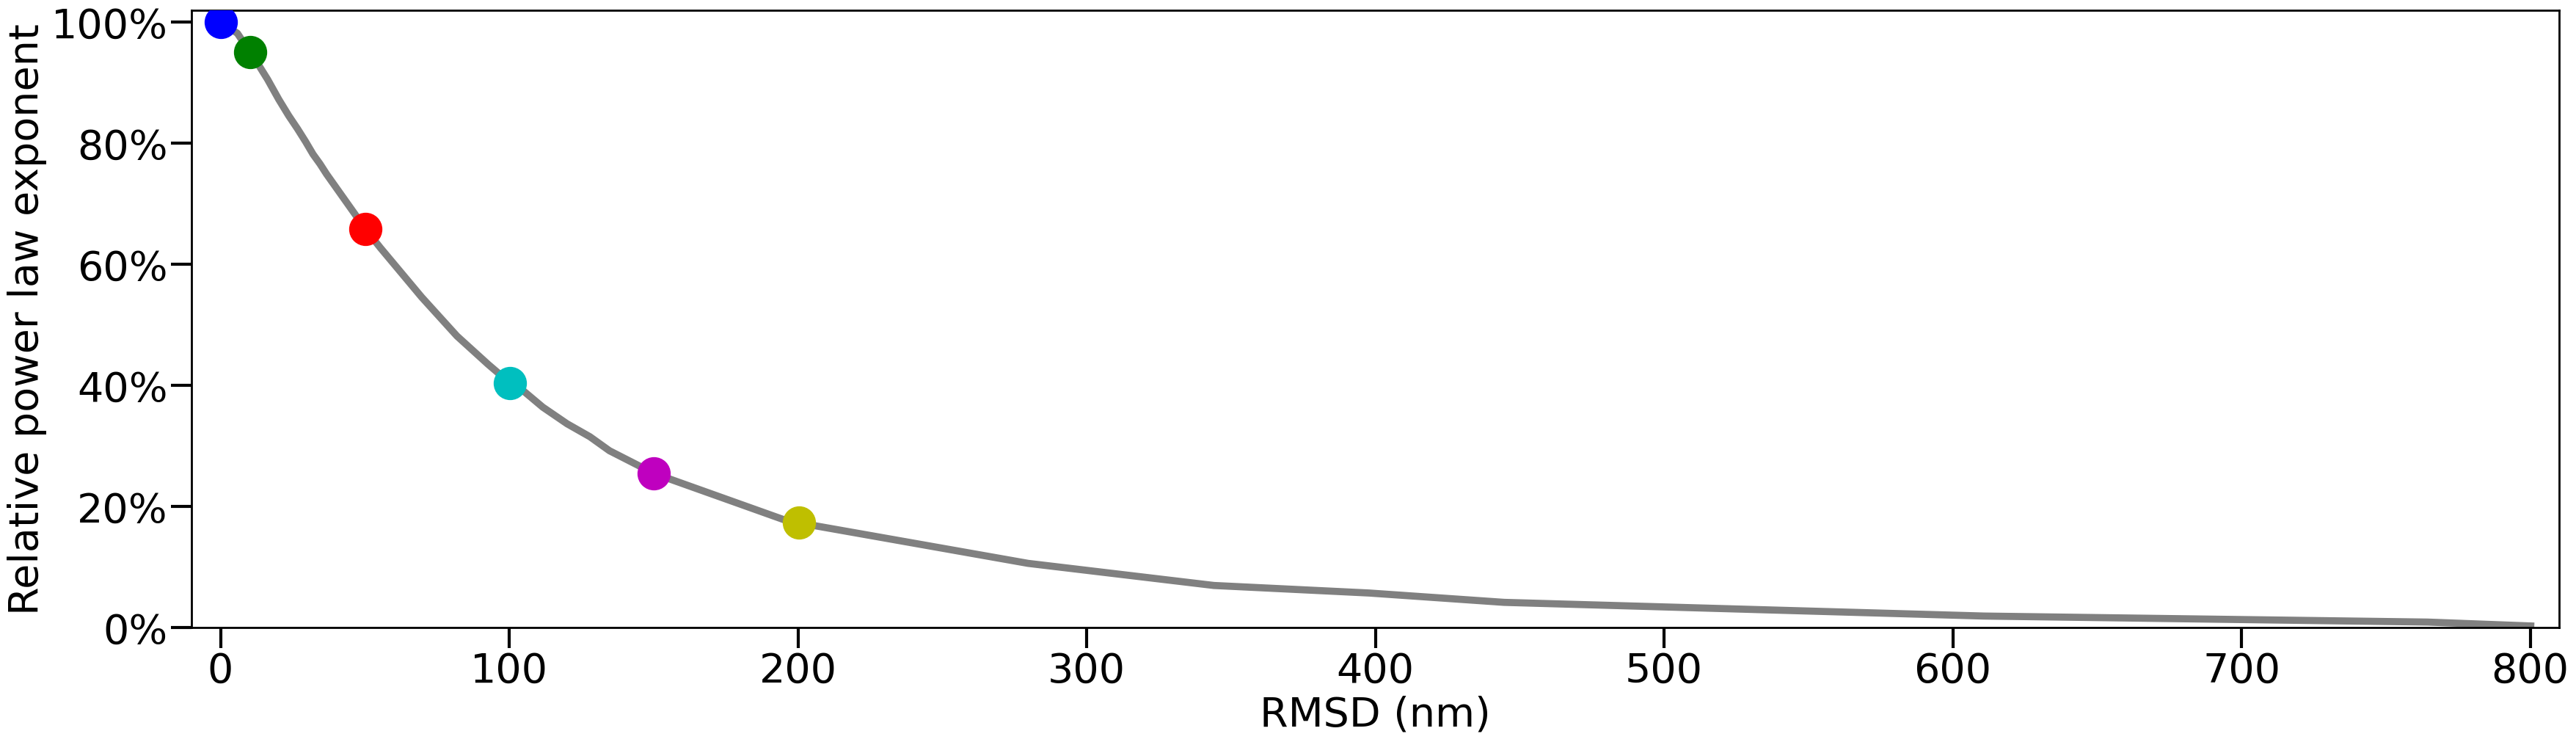

In [67]:
#PLOT FOR OLGA-EREZ PAPER / WOOLLY MAMMOTH
from matplotlib.ticker import PercentFormatter

import matplotlib.ticker as ticker

N_cuts    = [5500] 
No_N_cuts = len(N_cuts)
No_frames = len(iframes_5500)
degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp']

fig, ax = plt.subplots(layout='constrained')

#plt.plot(msd_t_0000, slope_t_0000, marker = 'o')

#Relative to undegraded structures
reduced_units_exp = slope_5500_l_all_NEW/slope_5500_l_all_NEW[0]

#Relative exponent measure where 1 corresponds to undegraded structures and 0 to structures at t=100tau
reduced_units_1to0 = slope_5500_l_all - slope_5500_l_all[-1]
reduced_units_1to0 = reduced_units_1to0/reduced_units_1to0[0]

#Points to highlight
#highlight_x = [msd_5500[0],msd_5500[14],msd_5500[20]] #msd_5500[19]]
#highlight_y = [reduced_units_exp[0],reduced_units_exp[14],reduced_units_exp[20]] #reduced_units_exp[19]]

ax.plot(10*np.sqrt(msd_5500_NEW), reduced_units_exp, linewidth=7.0, color='gray', zorder = 0) #, marker = 'o')

ax.scatter(10*np.sqrt(msd_5500_NEW[0]), reduced_units_exp[0], marker = 'o', color='b', s=1000, zorder = 6)
#ax.scatter(10*np.sqrt(msd_5500_NEW[1]), reduced_units_exp[1], marker = 'o', color='g', s=1000, zorder = 5)
ax.scatter(10*np.sqrt(msd_5500_NEW[2]), reduced_units_exp[2], marker = 'o', color='g', s=1000, zorder = 4)
#ax.scatter(10*np.sqrt(msd_5500_NEW[3]), reduced_units_exp[3], marker = 'o', color='c', s=1000, zorder = 3)
#ax.scatter(10*np.sqrt(msd_5500_NEW[14]), reduced_units_exp[14], marker = 'o', color='c', s=1000, zorder = 2)

ax.scatter(10*np.sqrt(msd_5500_NEW[12]), reduced_units_exp[12], marker = 'o', color='r', s=1000, zorder = 1)
ax.scatter(10*np.sqrt(msd_5500_NEW[17]), reduced_units_exp[17], marker = 'o', color='c', s=1000, zorder = 1)
ax.scatter(10*np.sqrt(msd_5500_NEW[23]), reduced_units_exp[23], marker = 'o', color='m', s=1000, zorder = 1)
ax.scatter(10*np.sqrt(msd_5500_NEW[25]), reduced_units_exp[25], marker = 'o', color='y', s=1000, zorder = 1)

#ax.set_ylabel('Power law exponent relative to native chromosome structures')
ax.set_ylabel('Relative power law exponent', size=40)

#plt.yscale("log")

bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def inverse(x):
    return np.interp(x, bp_axis, euc_axis)


def forward(x):
    return np.interp(x, euc_axis, bp_axis)

fig.set_figheight(10)
fig.set_figwidth(35)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    
ax.tick_params(width=3)

plt.ylim([0.,1.02])
plt.xlim([-10,810])

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel(r'RMSD (nm)', size=40)

plt.tick_params(axis='both', length=20, which='major', labelsize=40)
plt.tick_params(axis='both', length=20, which='minor', labelsize=40)

ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.00))

plt.savefig("RPLEvsRMSD.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [165]:
print(abs(params_RMSD10[1]),abs(params_RMSD25[1]), abs(params_RMSD50[1]),abs(params_RMSD100[1]),abs(params_RMSD200[1]))

0.5993842636103802 0.5280053083403863 0.4154773319114557 0.2548813982819392 0.1089460822074991


In [62]:
slope_5500_l_all_NEW_2 = np.array([0.63070613, 0.61925616, 0.5993842636103802, 0.59398276, 0.57134397, 0.55017518,
       0.53335027, 0.5280053083403863, 0.51966965, 0.50634199, 0.49317437, 0.48305576,
       0.47236046, 0.4154773319114557, 0.3959464 , 0.34422016, 0.30365253, 0.27406277,
       0.2548813982819392, 0.25242942, 0.22957662, 0.21223381, 0.1986756 , 0.18410879,
       0.11215618, 0.1089460822074991, 0.06670791, 0.04367526, 0.03580124, 0.02606399,
       0.0117985 , 0.00550665, 0.00145737])
slope_5500_l_all_NEW_2 = np.array(slope_5500_l_all_NEW_2)
print(len(slope_5500_l_all_NEW_2))

33


In [63]:
for i in range(len(msd_5500_RMSD10)):
    print(i, iframes_5500_RMSD10[i], 10*np.sqrt(msd_5500_RMSD10[i]), msd_5500_RMSD10[i])

for i in range(len(msd_5500_RMSD25)):
    print(i, iframes_5500_RMSD25[i], 10*np.sqrt(msd_5500_RMSD25[i]), msd_5500_RMSD25[i])
    
for i in range(len(msd_5500_RMSD100)):
    print(i, iframes_5500_RMSD100[i], 10*np.sqrt(msd_5500_RMSD100[i]), msd_5500_RMSD100[i])
    
for i in range(len(msd_5500_RMSD200)):
    print(i, iframes_5500_RMSD200[i], 10*np.sqrt(msd_5500_RMSD200[i]), msd_5500_RMSD200[i])

0 0 0.0 0.0
1 33 9.699769400591252 0.9408552642464638
2 34 9.977198450883796 0.9954448892831802
3 35 10.25168365897638 1.050970178437233
4 36 10.52323306739664 1.1073843419075011
5 37 10.791931062365956 1.1646577605485917
6 38 11.057810487163513 1.2227517277002335
7 39 11.320909072815436 1.2816298223495484
8 40 11.581257723884457 1.341255304670334
9 41 11.838878610126057 1.4015904674530029
10 42 12.093825208247733 1.4626060816764832
11 43 12.346156561728595 1.52427581846714
12 320 48.57745496482267 23.59769130859375
13 322 48.75439123007371 23.76990664215088
14 324 48.930768012453825 23.942200582885743
15 326 49.106560721718566 24.114543059158326
16 328 49.28188080146282 24.2870377532959
17 330 49.45673130533478 24.45968271408081
18 332 49.63104622201815 24.63240749092102
19 334 49.80473600602724 24.80511728630066
20 336 49.97788333561286 24.977888227081298
21 338 50.150589777253956 25.150816550064086
22 340 50.32285666489884 25.323899029159545
23 342 50.49467523923859 25.4971222751617

In [64]:
msd_5500_NEW_2 = np.array([0.0,
 0.34023073514699936,
1.050970178437233,
 1.3412413834095,
 2.64787547955513,
 4.081516234588623,
 5.577382842826843,
6.2644646718025205,
 7.112444385433197,
 8.677050878810883,
 10.265126305770874,
 11.875587023925782,
 13.505329298973084,
25.150816550064086,
 30.56237025527954,
 48.52820680923462,
 67.06571632461548,
 85.97997109680176,
101.33325439910888,
 105.16999488830567,
 124.54003103790284,
 144.06902705688478,
 163.73370895690917,
 181.4978314300537,
 381.0267772338867,
401.06524987792966,
 782.4698038574219,
 1183.7529149902343,
 1582.9381109375,
 1976.838588647461,
 3729.958712988281,
 5843.8419125,
 6402.925076660156])
print(len(msd_5500_NEW_2))

33


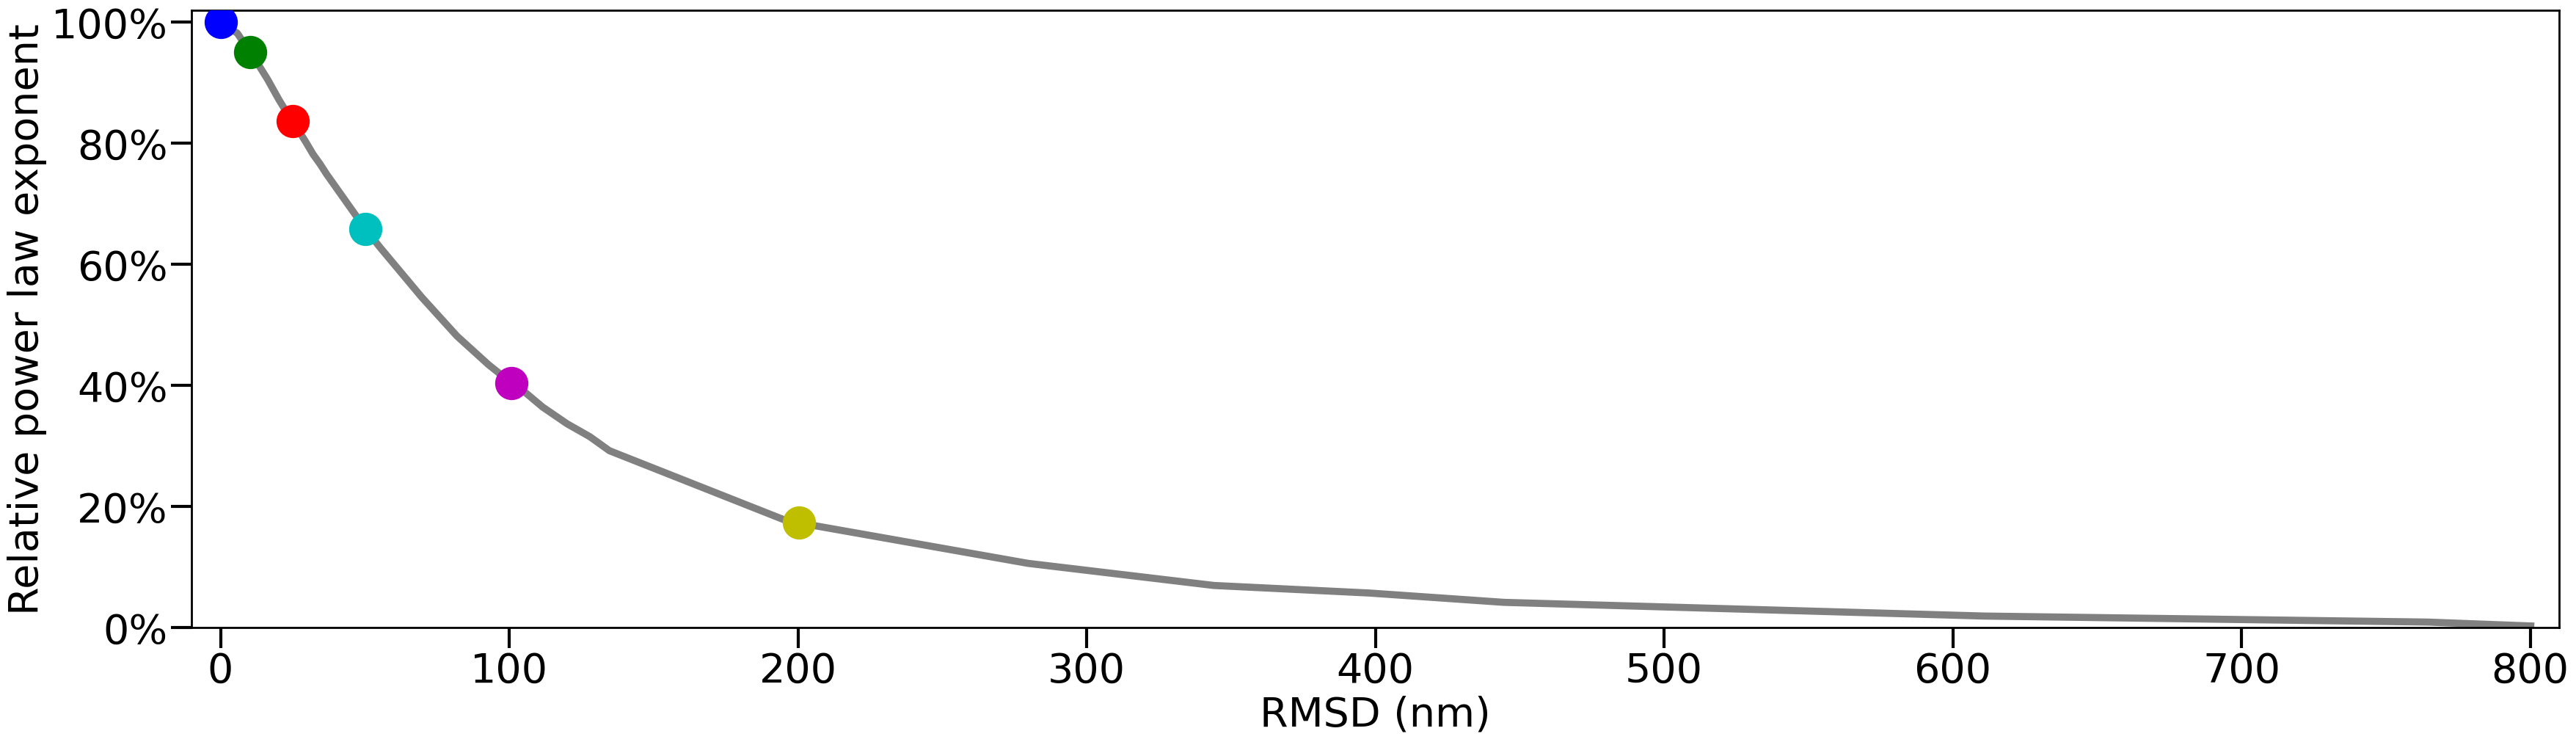

In [68]:
#PLOT FOR OLGA-EREZ PAPER / WOOLLY MAMMOTH
from matplotlib.ticker import PercentFormatter

import matplotlib.ticker as ticker

N_cuts    = [5500] 
No_N_cuts = len(N_cuts)
No_frames = len(iframes_5500)
degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp']

fig, ax = plt.subplots(layout='constrained')

#plt.plot(msd_t_0000, slope_t_0000, marker = 'o')

#Relative to undegraded structures
reduced_units_exp = slope_5500_l_all_NEW_2/slope_5500_l_all_NEW_2[0]

#Relative exponent measure where 1 corresponds to undegraded structures and 0 to structures at t=100tau
reduced_units_1to0 = slope_5500_l_all - slope_5500_l_all[-1]
reduced_units_1to0 = reduced_units_1to0/reduced_units_1to0[0]

#Points to highlight
#highlight_x = [msd_5500[0],msd_5500[14],msd_5500[20]] #msd_5500[19]]
#highlight_y = [reduced_units_exp[0],reduced_units_exp[14],reduced_units_exp[20]] #reduced_units_exp[19]]

ax.plot(10*np.sqrt(msd_5500_NEW_2), reduced_units_exp, linewidth=7.0, color='gray', zorder = 0) #, marker = 'o')

ax.scatter(10*np.sqrt(msd_5500_NEW_2[0]), reduced_units_exp[0], marker = 'o', color='b', s=1000, zorder = 6)
ax.scatter(10*np.sqrt(msd_5500_NEW_2[2]), reduced_units_exp[2], marker = 'o', color='g', s=1000, zorder = 4)
ax.scatter(10*np.sqrt(msd_5500_NEW_2[7]), reduced_units_exp[7], marker = 'o', color='r', s=1000, zorder = 1)
ax.scatter(10*np.sqrt(msd_5500_NEW_2[13]), reduced_units_exp[13], marker = 'o', color='c', s=1000, zorder = 1)
ax.scatter(10*np.sqrt(msd_5500_NEW_2[18]), reduced_units_exp[18], marker = 'o', color='m', s=1000, zorder = 1)
ax.scatter(10*np.sqrt(msd_5500_NEW_2[25]), reduced_units_exp[25], marker = 'o', color='y', s=1000, zorder = 1)

#ax.set_ylabel('Power law exponent relative to native chromosome structures')
ax.set_ylabel('Relative power law exponent', size=40)

#plt.yscale("log")

bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def inverse(x):
    return np.interp(x, bp_axis, euc_axis)


def forward(x):
    return np.interp(x, euc_axis, bp_axis)

fig.set_figheight(10)
fig.set_figwidth(35)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    
ax.tick_params(width=3)

plt.ylim([0.,1.02])
plt.xlim([-10,810])

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel(r'RMSD (nm)', size=40)

plt.tick_params(axis='both', length=20, which='major', labelsize=40)
plt.tick_params(axis='both', length=20, which='minor', labelsize=40)

ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.00))

plt.savefig("RPLEvsRMSD.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [75]:
#Creating table with data used for the previous RPLE vs RMSD plot and exporting as csv file

import csv

TableMSD_5500_NEW_2 = []

for i in range(len(msd_5500_NEW_2)):
    TableMSD_5500_NEW_2.append([10*np.sqrt(msd_5500_NEW_2[i]), reduced_units_exp[i]])
    print(i, 10*np.sqrt(msd_5500_NEW_2[i]), reduced_units_exp[i], TableMSD_5500_NEW_2[i])

csv_filename = "RPLEvsRMSD.csv"
with open(csv_filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(TableMSD_5500_NEW_2)


0 0.0 1.0 [0.0, 1.0]
1 5.83293009684669 0.9818457924295109 [5.83293009684669, 0.9818457924295109]
2 10.25168365897638 0.9503384145170434 [10.25168365897638, 0.9503384145170434]
3 11.581197621185384 0.9417741983893514 [11.581197621185384, 0.9417741983893514]
4 16.272293875035352 0.9058798429626806 [16.272293875035352, 0.9058798429626806]
5 20.202762767969688 0.872316208501097 [20.202762767969688, 0.872316208501097]
6 23.616483317434973 0.8456399020570801 [23.616483317434973, 0.8456399020570801]
7 25.028912624807575 0.8371653345756863 [25.028912624807575, 0.8371653345756863]
8 26.669166438854436 0.823948944336406 [26.669166438854436, 0.823948944336406]
9 29.456834315334845 0.8028176133312673 [29.456834315334845, 0.8028176133312673]
10 32.03923579889332 0.7819400296616746 [32.03923579889332, 0.7819400296616746]
11 34.46097361353243 0.7658967259442999 [34.46097361353243, 0.7658967259442999]
12 36.74959768347551 0.7489390661226013 [36.74959768347551, 0.7489390661226013]
13 50.15058977725395

In [199]:
print(10*np.sqrt(msd_5500_NEW_2[7]),reduced_units_exp[7])

25.028912624807575 0.8371653345756863


In [156]:
print(10*np.sqrt(msd_5500[14]),10*np.sqrt(msd_5500[20]))
print(reduced_units_exp[14],reduced_units_exp[20])

92.72538546525527 195.1990720351628
0.5457694853861655 0.3365018982770946


In [157]:
for i in range(len(msd_5500_NEW)):
    print(i, 10*np.sqrt(msd_5500_NEW[i]), reduced_units_exp[i])

0 0.0 1.0
1 5.83293009684669 0.9818457924295109
2 10.25168365897638 0.9503384145170434
3 11.581197621185384 0.9417741983893514
4 16.272293875035352 0.9058798429626806
5 20.202762767969688 0.872316208501097
6 23.616483317434973 0.8456399020570801
7 26.669166438854436 0.823948944336406
8 29.456834315334845 0.8028176133312673
9 32.03923579889332 0.7819400296616746
10 34.46097361353243 0.7658967259442999
11 36.74959768347551 0.7489390661226013
12 50.150589777253956 0.658749474833003
13 55.28324362343398 0.6277827044427172
14 69.66218975113732 0.5457694853861655
15 81.89366051448395 0.48144851549167594
16 92.72538546525527 0.4345332270672556
17 100.18091098148062 0.4041206929159531
18 102.55242312510498 0.4002330213597258
19 111.59750491740523 0.36399934784207666
20 120.0287578278159 0.3365018982770946
21 127.95847332510229 0.31500502460630914
22 134.7211310188768 0.29190899095906997
23 150.03507720051323 0.2546498676913803
24 195.1990720351628 0.17782636740822544
25 200.26613539935542 0.17

In [158]:
#Transformation between average Euclidean distances between pairs of loci and their corresponding genomic distances

x_coords = []
y_coords = []
average_vals = []
std_dev_vals = []

for idiag in range(1, 5500):
    
    diagonal = np.diagonal(dist_map_5500_0_tau[0], idiag)
    average  = np.mean(diagonal)
    std_dev  = np.std(diagonal)
    average_vals.append(average)
    std_dev_vals.append(std_dev)
    
    len_diagonal = len(diagonal)
    
    for ipair in range(len_diagonal):
        
        x_coords.append(idiag)
        y_coords.append(diagonal[ipair])

bp_vals = np.arange(1,5500)
average_vals = np.array(average_vals)
std_dev_vals = np.array(std_dev_vals)

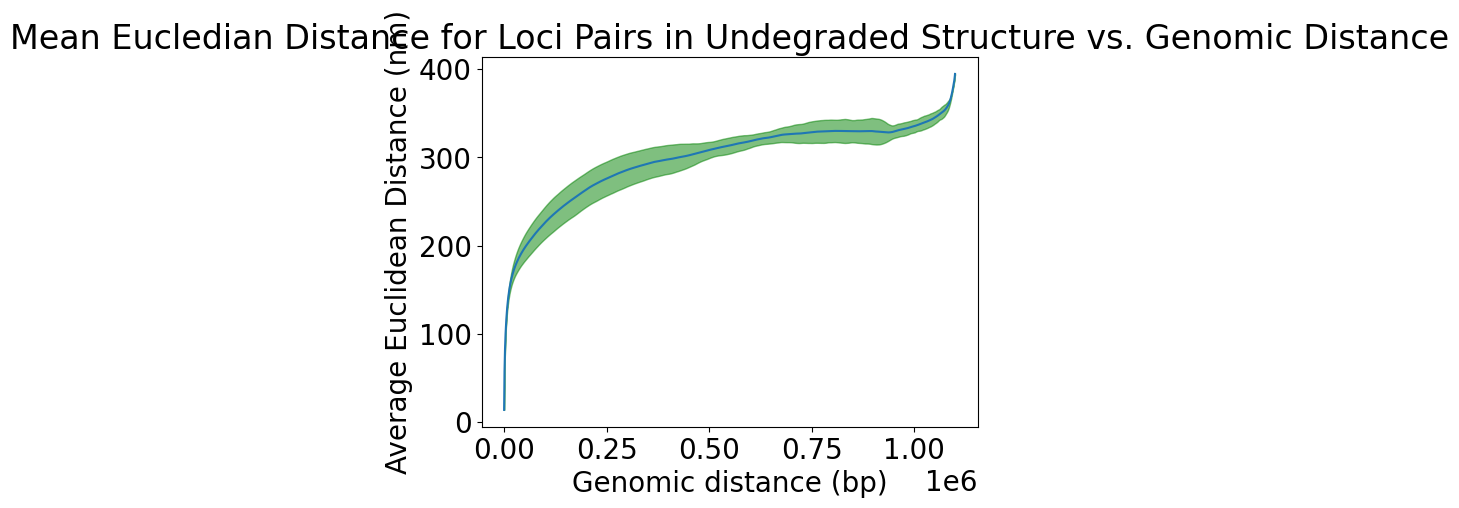

In [159]:
plt.ylabel('Average Euclidean Distance (nm)')
plt.xlabel('Genomic distance (bp)')
plt.title('Mean Eucledian Distance for Loci Pairs in Undegraded Structure vs. Genomic Distance')

#plt.xscale("log")
#plt.yscale("log")

plt.plot(200*bp_vals, 10*average_vals) #, marker = 'o')
plt.fill_between(200*bp_vals, 10*(average_vals+std_dev_vals), 10*(average_vals-std_dev_vals), color='g',alpha=0.5)

#plt.xlim([1e4,1.1e6])
#plt.ylim([1e2,5e2])

plt.show()

In [160]:
print(len(average_vals))
print(len(bp_vals))

5499
5499


In [ ]:
degrade_legend = ['t = '+str(0)+r'$\tau$','t = '+str(1)+r'$\tau$','t = '+str(2)+r'$\tau$','t = '+str(3)+r'$\tau$','t = '+str(4)+r'$\tau$','t = '+str(5)+r'$\tau$','t = '+str(6)+r'$\tau$','t = '+str(7)+r'$\tau$','t = '+str(8)+r'$\tau$','t = '+str(9)+r'$\tau$','t = '+str(10)+r'$\tau$']
degrade_legend.extend(['t = '+str(20)+r'$\tau$','t = '+str(30)+r'$\tau$','t = '+str(40)+r'$\tau$','t = '+str(50)+r'$\tau$','t = '+str(60)+r'$\tau$','t = '+str(70)+r'$\tau$','t = '+str(80)+r'$\tau$','t = '+str(90)+r'$\tau$','t = '+str(100)+r'$\tau$'])


num_plots = 21

lower_bound = 1

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

xticks_exp = np.linspace(1, dmax, dmax)
scale_factor_exp = 1000
scaled_xticks_exp = scale_factor_exp*xticks_exp
plt.plot(scaled_xticks_exp, normalize/5)

xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

#plt.plot(scaled_xticks, cont_prob_5000_0_tau[0])

for i in range(nsnap_5500_0_tau):
    plt.plot(10*average_vals, cont_prob_5500_0_tau[i])
    
for i in range(2,nsnap_5500_1_tau):
    plt.plot(10*average_vals, cont_prob_5500_1_tau[i])


plt.legend(degrade_legend, loc='upper right')
plt.ylabel('Contact Probability')
plt.yscale("log")
plt.xscale("log")
plt.title("No. cuts = 5500")


plt.ylim([1e-5,10e-3])
plt.xlim(100, 500)
plt.xlabel('Mean Eucledian Distance for Loci Pairs in Undegraded Structure (nm)')

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.5, 1.0))

plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [ ]:
degrade_legend = ['t = '+str(0)+r'$\tau$','t = '+str(1)+r'$\tau$','t = '+str(2)+r'$\tau$','t = '+str(3)+r'$\tau$','t = '+str(4)+r'$\tau$','t = '+str(5)+r'$\tau$','t = '+str(6)+r'$\tau$','t = '+str(7)+r'$\tau$','t = '+str(8)+r'$\tau$','t = '+str(9)+r'$\tau$','t = '+str(10)+r'$\tau$']
degrade_legend.extend(['t = '+str(20)+r'$\tau$','t = '+str(30)+r'$\tau$','t = '+str(40)+r'$\tau$','t = '+str(50)+r'$\tau$','t = '+str(60)+r'$\tau$','t = '+str(70)+r'$\tau$','t = '+str(80)+r'$\tau$','t = '+str(90)+r'$\tau$','t = '+str(100)+r'$\tau$'])

num_plots = 21

lower_bound = 1

fig, ax = plt.subplots(layout='constrained')

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

xticks_exp = np.linspace(1, dmax, dmax)
scale_factor_exp = 1000
scaled_xticks_exp = scale_factor_exp*xticks_exp
#plt.plot(scaled_xticks_exp, normalize/5)

xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

#plt.plot(scaled_xticks, cont_prob_5000_0_tau[0])

for i in range(nsnap_5500_0_tau):
    ax.plot(scaled_xticks, cont_prob_5500_0_tau[i])
    
for i in range(2,nsnap_5500_1_tau):
    ax.plot(scaled_xticks, cont_prob_5500_1_tau[i])


plt.legend(degrade_legend, loc='upper right')
plt.xlim([0,5500])
plt.ylabel('Contact Probability')
plt.yscale("log")
plt.xscale("log")
plt.title("No. cuts = 5500")
plt.xlim([1,5500])
plt.ylim([1e-8,1e1])


plt.xlim([scale_factor*1,scale_factor*5500])

plt.ylim([1e-5,1e-2])
plt.xlim(3000, 1000000)
plt.xlabel('Genomic Distance (bp)')

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.5, 1.0))

bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def forward(x):
    return np.interp(x, bp_axis, euc_axis)


def inverse(x):
    return np.interp(x, euc_axis, bp_axis)


secax = ax.secondary_xaxis('top', functions=(forward, inverse))
#secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('Mean Eucledian Distance for Loci Pairs in Undegraded Structure (nm)')

plt.show()

plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [ ]:
degrade_legend = ['Experimental - 1Kb (Nat. Comm 14, 3303 (2023))', 't = '+str(0)+r'$\tau$','t = '+str(1)+r'$\tau$','t = '+str(2)+r'$\tau$','t = '+str(3)+r'$\tau$','t = '+str(4)+r'$\tau$','t = '+str(5)+r'$\tau$','t = '+str(6)+r'$\tau$','t = '+str(7)+r'$\tau$','t = '+str(8)+r'$\tau$','t = '+str(9)+r'$\tau$','t = '+str(10)+r'$\tau$']
degrade_legend.extend(['t = '+str(20)+r'$\tau$','t = '+str(30)+r'$\tau$','t = '+str(40)+r'$\tau$','t = '+str(50)+r'$\tau$','t = '+str(60)+r'$\tau$','t = '+str(70)+r'$\tau$','t = '+str(80)+r'$\tau$','t = '+str(90)+r'$\tau$','t = '+str(100)+r'$\tau$'])

num_plots = 21

lower_bound = 1

fig, ax = plt.subplots(layout='constrained')

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

xticks_exp = np.linspace(1, dmax, dmax)
scale_factor_exp = 1000
scaled_xticks_exp = scale_factor_exp*xticks_exp
plt.plot(scaled_xticks_exp, normalize/normalize[599], zorder = 10)

xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

xticks = np.linspace(1, 5500, 5499) 

scale_factor = 200
scaled_xticks = scale_factor*xticks


#plt.plot(scaled_xticks, cont_prob_5000_0_tau[0])

for i in range(nsnap_5500_0_tau):
    ax.plot(scaled_xticks, cont_prob_5500_0_tau[i]/cont_prob_5500_0_tau[i][2999])
    
for i in range(2,nsnap_5500_1_tau):
    ax.plot(scaled_xticks, cont_prob_5500_1_tau[i]/cont_prob_5500_1_tau[i][2999])


plt.legend(degrade_legend, loc='upper right')
plt.xlim([0,5500])
plt.ylabel('Contact Probability / Contact probability at 600Kbp')
plt.yscale("log")
plt.xscale("log")
plt.title("No. cuts = 5500")
plt.xlim([1,5500])
plt.ylim([1e-8,1e1])


plt.xlim([scale_factor*1,scale_factor*5500])

plt.ylim([1e-0,1e2])
plt.xlim(3000, 1000000)
plt.xlabel('Genomic Distance (bp)')

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.5, 1.0))

bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def forward(x):
    return np.interp(x, bp_axis, euc_axis)


def inverse(x):
    return np.interp(x, euc_axis, bp_axis)


secax = ax.secondary_xaxis('top', functions=(forward, inverse))
#secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('Mean Euclidean Separation of Nucleosome Pairs in Undegraded Structures (nm)')

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(2.18, 1.1))

plt.show()

plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [ ]:
degrade_legend = ['Experimental - 1Kb (Nat. Comm 14, 3303 (2023))', 't = '+str(0)+r'$\tau$','t = '+str(1)+r'$\tau$','t = '+str(2)+r'$\tau$','t = '+str(3)+r'$\tau$','t = '+str(4)+r'$\tau$','t = '+str(5)+r'$\tau$','t = '+str(6)+r'$\tau$','t = '+str(7)+r'$\tau$','t = '+str(8)+r'$\tau$','t = '+str(9)+r'$\tau$','t = '+str(10)+r'$\tau$']
degrade_legend.extend(['t = '+str(20)+r'$\tau$','t = '+str(30)+r'$\tau$','t = '+str(40)+r'$\tau$','t = '+str(50)+r'$\tau$','t = '+str(60)+r'$\tau$','t = '+str(70)+r'$\tau$','t = '+str(80)+r'$\tau$','t = '+str(90)+r'$\tau$','t = '+str(100)+r'$\tau$'])

num_plots = 21

lower_bound = 1

fig, ax = plt.subplots(layout='constrained')

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

xticks_exp = np.linspace(1, dmax, dmax)
scale_factor_exp = 1000
scaled_xticks_exp = scale_factor_exp*xticks_exp
plt.plot(scaled_xticks_exp, normalize/normalize[2], zorder = 10)

xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

xticks = np.linspace(1, 5500, 5499) 

scale_factor = 200
scaled_xticks = scale_factor*xticks


#plt.plot(scaled_xticks, cont_prob_5000_0_tau[0])

for i in range(nsnap_5500_0_tau):
    ax.plot(scaled_xticks, cont_prob_5500_0_tau[i]/cont_prob_5500_0_tau[i][14])
    
for i in range(2,nsnap_5500_1_tau):
    ax.plot(scaled_xticks, cont_prob_5500_1_tau[i]/cont_prob_5500_1_tau[i][14])


plt.legend(degrade_legend, loc='upper right')
plt.xlim([0,5500])
plt.ylabel('Contact Probability / Contact probability at 3Kbp')
plt.yscale("log")
plt.xscale("log")
plt.title("No. cuts = 5500")
plt.xlim([1,5500])
plt.ylim([1e-8,1e1])


plt.xlim([scale_factor*1,scale_factor*5500])

plt.ylim([1e-2,1e0])
plt.xlim(3000, 1000000)
plt.xlabel('Genomic Distance (bp)')

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.5, 1.0))

bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def forward(x):
    return np.interp(x, bp_axis, euc_axis)


def inverse(x):
    return np.interp(x, euc_axis, bp_axis)


secax = ax.secondary_xaxis('top', functions=(forward, inverse))
#secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('Mean Euclidean Separation of Nucleosome Pairs in Undegraded Structures (nm)')

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(2.18, 1.1))

plt.show()

plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [ ]:
scaled_xticks[14]

In [ ]:
degrade_legend = ['Experimental - 1Kb', 't = '+str(0)+r'$\tau$','t = '+str(1)+r'$\tau$','t = '+str(2)+r'$\tau$','t = '+str(3)+r'$\tau$','t = '+str(4)+r'$\tau$','t = '+str(5)+r'$\tau$','t = '+str(6)+r'$\tau$','t = '+str(7)+r'$\tau$','t = '+str(8)+r'$\tau$','t = '+str(9)+r'$\tau$','t = '+str(10)+r'$\tau$']
degrade_legend.extend(['t = '+str(20)+r'$\tau$','t = '+str(30)+r'$\tau$','t = '+str(40)+r'$\tau$','t = '+str(50)+r'$\tau$','t = '+str(60)+r'$\tau$','t = '+str(70)+r'$\tau$','t = '+str(80)+r'$\tau$','t = '+str(90)+r'$\tau$','t = '+str(100)+r'$\tau$'])

num_plots = 21

lower_bound = 1

fig, ax = plt.subplots(layout='constrained')

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

xticks_exp = np.linspace(1, dmax, dmax)
scale_factor_exp = 1000
scaled_xticks_exp = scale_factor_exp*xticks_exp
plt.plot(scaled_xticks_exp, normalize/5)

xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

xticks = np.linspace(1, 5500, 5499) 

scale_factor = 200
scaled_xticks = scale_factor*xticks


#plt.plot(scaled_xticks, cont_prob_5000_0_tau[0])

for i in range(nsnap_5500_0_tau):
    ax.plot(scaled_xticks, cont_prob_5500_0_tau[i])
    
for i in range(2,nsnap_5500_1_tau):
    ax.plot(scaled_xticks, cont_prob_5500_1_tau[i])


plt.legend(degrade_legend, loc='upper right')
plt.xlim([0,5500])
plt.ylabel('Contact Probability')
plt.yscale("log")
plt.xscale("log")
plt.title("No. cuts = 5500")
plt.xlim([1,5500])
plt.ylim([1e-8,1e1])


plt.xlim([scale_factor*1,scale_factor*5500])

plt.ylim([1e-5,1e-2])
plt.xlim(3000, 1000000)
plt.xlabel('Genomic Distance (bp)')

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.5, 1.0))

bp_axis  = 200*bp_vals
euc_axis = 10*average_vals

def forward(x):
    return np.interp(x, bp_axis, euc_axis)


def inverse(x):
    return np.interp(x, euc_axis, bp_axis)


secax = ax.secondary_xaxis('top', functions=(forward, inverse))
#secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('Mean Eucledian Distance for Loci Pairs in Undegraded Structure (nm)')

plt.show()

plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [ ]:
'''
degrade_legend = ['No. deg. cuts = '+str(5499)+', from 10Kbp to 100Kbp', 'No. deg. cuts = '+str(5499)+', from 100Kbp to 800Kbp', 'No. deg. cuts = '+str(5499)+', from 10Kbp to 800Kbp', 'Woolly Mammoth - Scaff 28 - 500Kb', 'Experimental - 1Kb (Nat. Comm 14, 3303 (2023))', 'Experimental - 1Kb (PNAS 112, 47 (2015))', 'Range of Typical Experimental Exponent Measurements']

fig, ax = plt.subplots(layout='constrained')

ax.plot(iframes_5500, slope_5500_l, marker = 'o')
ax.plot(iframes_5500, slope_5500_r, marker = 'o')
ax.plot(iframes_5500, slope_5500_all, marker = 'o')

x = [0, 100]
y = np.abs([params_woolly[1],params_woolly[1]])
ax.plot(x, y)

x = [0, 100]
y = np.abs([params_exp[1],params_exp[1]])
ax.plot(x, y)

x_sanborn = [0, 100]
y_sanborn = [0.65,0.65]

ax.plot(x_sanborn, y_sanborn)

#plt.xlim([0,5500])
plt.ylabel('Power law exponent')
#plt.yscale("log")
#plt.xscale("log")
plt.title("Power law exponents of contact probability vs. time")
#plt.xlim([1,5500])
#plt.ylim([1e1,1e1])

y1 = 0.6
y2 = abs(params_exp[1])

plt.fill_between(x, y2=y2, y1=y1,  facecolor ='green', alpha = 0.2) 

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(2.19, 1.0))

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel('Time ('+r'$\tau$)')

time_axis  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
euc_axis   = 10*np.sqrt(msd_5500)

def forward(x):
    return np.interp(x, time_axis, euc_axis)


def inverse(x):
    return np.interp(x, euc_axis, time_axis)


secax = ax.secondary_xaxis('top', functions=(forward, inverse))
#secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('Average RMSD of nucleosomes (nm)')



plt.show()

'''

In [ ]:
scaled_xticks_exp[599]

In [ ]:
#Calculation of average distance between pairs of loci at each time snapshot

ave_separation = []

for i in range(nsnap_5500_0_tau):
    ave = 10*np.average(np.triu(dist_map_5500_0_tau[i], k = 1))
    ave_separation.append(ave)
    
for i in range(2,nsnap_5500_1_tau):
    ave = 10*np.average(np.triu(dist_map_5500_1_tau[i], k = 1))
    ave_separation.append(ave)

#List with times of snapshots
    
time_snapshots = []
time_snapshots.extend(iframes_5500_0_tau)
time_snapshots.extend(iframes_5500_1_tau)
time_snapshots = list(set(time_snapshots))

In [ ]:
'''

degrade_legend = ['No. deg. cuts = '+str(5499)+', below 100Kbp', 'No. deg. cuts = '+str(5499)+', above 100Kbp', 'Woolly Mammoth - 500Kb', 'Experimental - 1Kb (Nat. Comm 14, 3303 (2023))', 'Experimental - 1Kb (PNAS 112, 47 (2015))', 'Range of Typical Experimental Exponent Measurements']

fig, ax = plt.subplots(layout='constrained')

ax.plot(iframes_5500, slope_5500_l, marker = 'o')
ax.plot(iframes_5500, slope_5500_r, marker = 'o')

x = [0, 100]
y = np.abs([params_woolly[1],params_woolly[1]])
plt.plot(x, y)

x = [0, 100]
y = np.abs([params_exp[1],params_exp[1]])
ax.plot(x, y)

x_sanborn = [0, 100]
y_sanborn = [0.65,0.65]

ax.plot(x_sanborn, y_sanborn)

#plt.xlim([0,5500])
plt.ylabel('Power law exponent')
#plt.yscale("log")
#plt.xscale("log")
plt.title("Power law exponents of contact probability vs. time")
#plt.xlim([1,5500])
#plt.ylim([1e1,1e1])

y1 = 0.6
y2 = abs(params_exp[1])

plt.fill_between(x, y2=y2, y1=y1,  facecolor ='green', alpha = 0.2) 

plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(2.19, 1.0))

#plt.xlim([scale_factor*1,scale_factor*5500])
plt.xlabel('Time ('+r'$\tau$)')

time_axis  = time_snapshots
euc_axis   = ave_separation

def forward(x):
    return np.interp(x, time_axis, euc_axis)


def inverse(x):
    return np.interp(x, euc_axis, time_axis)


secax = ax.secondary_xaxis('top', functions=(forward, inverse))
#secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('Average separation between pairs of nucleosomes of degraded DNA (nm)')



plt.show()

'''

In [ ]:
num_plots = 21

lower_bound = 1

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))


xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

xticks = np.linspace(1, 5500, 5499) 

scale_factor = 200
scaled_xticks = scale_factor*xticks


#plt.plot(scaled_xticks, cont_prob_5000_0_tau[0])

#plt.plot(scaled_xticks, cont_prob_5000_1_tau[0])

    
for i in range(0,nsnap_5500_1_tau):
    plt.plot(scaled_xticks, cont_prob_5500_1_tau[i])


#plt.legend(degrade_legend, loc='upper right')
plt.xlim([0,5500])
plt.ylabel('Contact Probability')
plt.yscale("log")
plt.xscale("log")
#plt.title("No. cuts = 5000")
plt.xlim([1,5500])
plt.ylim([1e-8,1e1])


plt.xlim([scale_factor*1,scale_factor*5500])

plt.ylim([1e-5,1e-2])
plt.xlim(3000, 200000)
plt.xlabel('Genomic Distance (bp)')

#plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.9, 1.0))

plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [ ]:
num_plots = 21

lower_bound = 1

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))


xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

xticks = np.linspace(1, 5500, 5499) 

scale_factor = 200
scaled_xticks = scale_factor*xticks


plt.plot(scaled_xticks, cont_prob_5500_1_tau[0])   


#plt.legend(degrade_legend, loc='upper right')
plt.xlim([0,5500])
plt.ylabel('Contact Probability')
plt.yscale("log")
plt.xscale("log")
#plt.title("No. cuts = 5000")
plt.xlim([1,5500])
plt.ylim([1e-8,1e1])


plt.xlim([scale_factor*1,scale_factor*5500])

plt.ylim([1e-5,1e-2])
plt.xlim(3000, 200000)
plt.xlabel('Genomic Distance (bp)')

#plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.9, 1.0))

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 

mpl.rcParams.update({'font.size': 20})

plt.tick_params('both', length=10, width=2, which='major') #, direction="in", pad=10)
plt.tick_params('both', length=5, width=1, which='minor') #, direction="in", pad=10)

plt.savefig('pcont_t0tau.png', transparent=True)

plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [ ]:
num_plots = 21

lower_bound = 1

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))


xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

xticks = np.linspace(1, 5500, 5499) 

scale_factor = 200
scaled_xticks = scale_factor*xticks


plt.plot(scaled_xticks, cont_prob_5500_1_tau[5])   


#plt.legend(degrade_legend, loc='upper right')
plt.xlim([0,5500])
plt.ylabel('Contact Probability')
plt.yscale("log")
plt.xscale("log")
#plt.title("No. cuts = 5000")
plt.xlim([1,5500])
plt.ylim([1e-7,1e1])


plt.xlim([scale_factor*1,scale_factor*5500])

plt.ylim([1e-5,1e-2])
plt.xlim(3000, 200000)
plt.xlabel('Genomic Distance (bp)')

plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')

plt.savefig('pcont_t50tau.png', transparent=False)

#plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.9, 1.0))

plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [ ]:
num_plots = 21

lower_bound = 1

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))


xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

xticks = np.linspace(1, 5500, 5499) 

scale_factor = 200
scaled_xticks = scale_factor*xticks


plt.plot(scaled_xticks, cont_prob_5500_1_tau[10])   


#plt.legend(degrade_legend, loc='upper right')
plt.xlim([0,5500])
plt.ylabel('Contact Probability')
plt.yscale("log")
plt.xscale("log")
#plt.title("No. cuts = 5000")
plt.xlim([1,5500])
plt.ylim([1e-7,1e1])


plt.xlim([scale_factor*1,scale_factor*5500])

plt.ylim([1e-5,1e-2])
plt.xlim(3000, 200000)
plt.xlabel('Genomic Distance (bp)')

plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')

plt.savefig('pcont_t100tau.png', transparent=True)

#plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.9, 1.0))

plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [ ]:

lower_bound = 1

colormap = plt.cm.gist_ncar
figure = plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))


xticks = np.linspace(1, 5500, 5499) 
scale_factor = 200
scaled_xticks = scale_factor*xticks

xticks = np.linspace(1, 5500, 5499) 

scale_factor = 200
scaled_xticks = scale_factor*xticks


#plt.plot(scaled_xticks, cont_prob_5500_coarse_tau[-1])   


plt.legend(degrade_legend, loc='upper right')
plt.xlim([0,5500])
plt.ylabel('Contact Probability')
plt.yscale("log")
plt.xscale("log")
plt.title("No. cuts = 5000")
plt.xlim([1,5500])
plt.ylim([1e-7,1e1])


plt.xlim([scale_factor*1,scale_factor*5500])

plt.ylim([1e-7,1e-2])
plt.xlim(3000, 200000)
plt.xlabel('Genomic Distance (bp)')

plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')

#plt.legend(degrade_legend, loc='upper right', bbox_to_anchor=(1.9, 1.0))

plt.close(figure)

#plt.show()

#Notice that the curve for p=1 has a very large number of ligations happening at a genomic distance of 1, meaning most of the ligations take place
#immediately, without the system having any chance to move. This explains why the p=1 curve seems to break the ordered pattern that the rest of the
#probability rates follow

In [ ]:
print(iframes_5500_1_tau)
print(iframes_5500_0_tau)
print(reduced_units_exp)

In [ ]:
#cont_map_5000_1_tau[0]

symm = cont_map_5500_1_tau[0]-np.diag(np.diag(cont_map_5500_1_tau[0])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
#np.savetxt('contactmap_rthresh_1xrc_t_0tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("t_0tau.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
np.max(symm)

In [ ]:
#cont_map_5000_1_tau[0]

symm = cont_map_5500_0_tau[1]-np.diag(np.diag(cont_map_5500_0_tau[1])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_t_1tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("t_1tau.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
np.max(symm)

In [ ]:
#cont_map_5000_1_tau[0]

symm = cont_map_5500_0_tau[2]-np.diag(np.diag(cont_map_5500_0_tau[2])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_t_2tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("t_2tau.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
np.max(symm)

In [ ]:
#cont_map_5000_1_tau[0]

symm = cont_map_5500_0_tau[3]-np.diag(np.diag(cont_map_5500_0_tau[3])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_t_3tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("t_3tau.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
np.max(symm)

In [ ]:
#cont_map_5000_1_tau[5]

symm = cont_map_5500_1_tau[5]-np.diag(np.diag(cont_map_5500_1_tau[5])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
#np.savetxt('contactmap_rthresh_1xrc_t_50tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("t_50tau.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)

In [ ]:
np.max(symm)

In [ ]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_1_tau[10]-np.diag(np.diag(cont_map_5500_1_tau[10])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
#np.savetxt('contactmap_rthresh_1xrc_t_100tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("t_100tau.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)

In [ ]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_coarse_tau[1]-np.diag(np.diag(cont_map_5500_coarse_tau[1])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
#np.savetxt('contactmap_rthresh_1xrc_t_200tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("t_200tau.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)

In [ ]:
np.max(symm)

In [ ]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_coarse_tau[2]-np.diag(np.diag(cont_map_5500_coarse_tau[2])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_t_400tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("t_400tau.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)

In [ ]:
np.max(symm)

In [ ]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_coarse_tau[3]-np.diag(np.diag(cont_map_5500_coarse_tau[3])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
#np.savetxt('contactmap_rthresh_1xrc_t_600tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("t_600tau.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)

In [ ]:
np.max(symm)

In [ ]:
iframes_5500_coarse_tau[3]

In [ ]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_coarse_tau[-1]-np.diag(np.diag(cont_map_5500_coarse_tau[-1])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_t_5000tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("t_5000tau.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)

In [ ]:
np.max(symm)

In [ ]:
print(np.sum(cont_map_5500_1_tau[0]),np.sum(cont_map_5500_1_tau[5]),np.sum(cont_map_5500_1_tau[10]))

In [ ]:

#symm = cont_map_5000_coarse_tau[-1]-np.diag(np.diag(cont_map_5000_coarse_tau[-1])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
#plt.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
#np.savetxt('contactmap_rthresh_1xrc_t_5000tau.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

#plt.show()
#np.diag(symm)

In [ ]:
#cont_map_5000_1_tau[10]

fig, ax = plt.subplots()
ax.matshow(symm*0, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
#np.savetxt('contactmap_rthresh_1xrc_t_100tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("axes.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)

In [ ]:
#cont_map_5000_1_tau[10]

fig, ax = plt.subplots()
ax.matshow(symm*0, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
#np.savetxt('contactmap_rthresh_1xrc_t_100tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='x', which='minor', labelsize=16)

b = ax.get_xticks().tolist()
b = [95.3, '       95.4', '', 95.8, '', '        96.2 Mbp', '']
c = ['', '', '', '', '', '', '']

ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.tick_params(left = False) 
plt.tick_params(bottom = False) 

plt.tick_params(axis='both',length=10, which='major', labelsize=15)

plt.savefig("axes.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)

In [ ]:
for i in range(len(msd_5500)): 
    print(i, 10*np.sqrt(msd_5500)[i], 10*np.sqrt(msd_5500)[i]/11, reduced_units_exp[i])

In [ ]:
for i in range(len(msd_5500)):
    print(i, iframes_5500[i], 10*np.sqrt(msd_5500[i]))

In [ ]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_RMSD10[3]-np.diag(np.diag(cont_map_5500_RMSD10[3])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_RMSD10_tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

#plt.savefig("t_RMSD50.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)

print(np.max(symm))

In [ ]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_RMSD10[21]-np.diag(np.diag(cont_map_5500_RMSD10[21])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_RMSD50_tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

#plt.savefig("t_RMSD50.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)

print(np.max(symm))

In [ ]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_RMSD10[27]-np.diag(np.diag(cont_map_5500_RMSD10[27])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_RMSD100_tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

#plt.savefig("t_RMSD100.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)
np.max(symm)

In [ ]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_RMSD150[2]-np.diag(np.diag(cont_map_5500_RMSD150[2])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_RMSD150_tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

#plt.savefig("t_RMSD150.pdf", format="pdf", bbox_inches="tight")

plt.show()
np.max(symm)

In [ ]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_RMSD200[6]-np.diag(np.diag(cont_map_5500_RMSD200[6])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_RMSD200_tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

#plt.savefig("t_RMSD200.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)
print(np.max(symm))

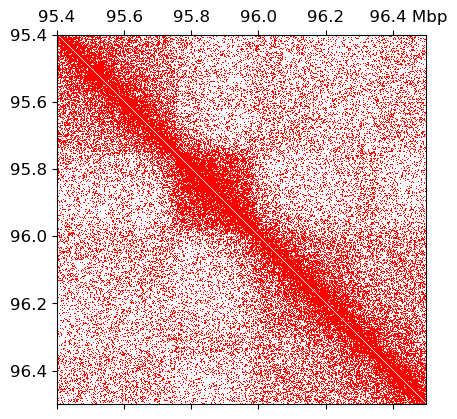

101


In [200]:
#cont_map_5000_1_tau[10]

symm = cont_map_5500_RMSD25[8]-np.diag(np.diag(cont_map_5500_RMSD25[8])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
np.savetxt('contactmap_rthresh_1xrc_RMSD25_tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

#plt.savefig("t_RMSD200.pdf", format="pdf", bbox_inches="tight")

plt.show()
#np.diag(symm)
print(np.max(symm))

In [ ]:
#cont_map_5000_1_tau[0]

symm = cont_map_5500_1_tau[0]-np.diag(np.diag(cont_map_5500_1_tau[0])) #+ np.transpose(icm2[1]) - 2*np.diag(np.diag(icm2[1]))
symm = symm*5000
symm = symm.astype(int)
fig, ax = plt.subplots()
ax.matshow(symm, cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4)
#plt.title('Contact Map $r_{thresh} = $'+str(1)+' x $r_c$')
#np.savetxt('contactmap_rthresh_1xrc_t_0tau_5500.csv', symm, delimiter=" ")
#plt.matshow(cont_map_5000_1_tau[0]-np.diag(np.diag(cont_map_5000_1_tau[0])), cmap=LinearSegmentedColormap.from_list("bright_red",[(1,1,1),(1,0,0)]), vmin=0, vmax=1e-4, interpolation='none')
#plt.axis('off')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

b = ax.get_xticks().tolist()
b = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, '      96.4 Mbp']
c = [95.3, 95.4, 95.6, 95.8, 96.0, 96.2, 96.4]
ax.set_xticklabels(b)
ax.set_yticklabels(c)

plt.savefig("RMSD_0.pdf", format="pdf", bbox_inches="tight")

plt.show()

print(np.max(symm))